# Time Series Practice

This notebook will be a two-part one, Section One focusing on recreating the Time Series examples from Hands-On Machine Learning by Aurelion Geron to refresh and provide a simplified example and Section Two being an applied time series problem on a real-world dataset from Kaggle.com, which can be found at:

https://www.kaggle.com/datasets/podsyp/time-series-starter-dataset?select=Month_Value_1.csv

### Section 1: Forecasting Time Series (Hands-On ML pg503)

In [ ]:
# Generate time steps programatically
import numpy as np

def generate_time_series (batch_size, n_steps):
  freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10)) # wave 1
  series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20)) # + wave 2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
  return series[...,np.newaxis].astype(np.float32)

In [ ]:
# Create training, validation, and test sets using our function
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
# Create a baseline forecasting metric using naive forecasting
import tensorflow as tf

y_pred = X_valid[:, -1]
np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred))

0.021203313

In [ ]:
# One more baseline model using a simple Flatten and Dense layer
from tensorflow.keras import layers

dense_base = tf.keras.Sequential([
    layers.Flatten(input_shape=[50, 1]),
    layers.Dense(1)
])

In [ ]:
dense_base.compile(loss = 'mse', optimizer='adam')
dense_base.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 26s 1ms/step - loss: 0.1845
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0608
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0339
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 11/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 12/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 13/20
219/219 [===

In [ ]:
y_pred = dense_base.predict(X_valid)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[-0.70696   ],
       [-0.6293311 ],
       [ 0.09717769],
       ...,
       [-0.07448824],
       [ 0.25662404],
       [ 0.22974955]], dtype=float32)

In [ ]:
base_results = dense_base.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 1ms/step - loss: 0.0035


In [ ]:
# Try to beat the baseline models by implementing a (very) simple RNN
model1 = tf.keras.Sequential([
    layers.SimpleRNN(1, input_shape=[None, 1]) # no need to specify length of input sequences
])

model1.compile(loss='mse',
               optimizer='adam')
model1.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 3s 7ms/step - loss: 0.1837
Epoch 2/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1483
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1423
Epoch 4/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1417
Epoch 5/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1413
Epoch 6/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1417
Epoch 7/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1411
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.1413
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.1411
Epoch 10/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1411
Epoch 11/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1416
Epoch 12/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1421
Epoch 13/20
219/219 [====

In [ ]:
# Add more recurrent layers to create a DeepRNN
model2 = tf.keras.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20, return_sequences=True),
    layers.SimpleRNN(1) # single unit for univariate time series
])

model2.compile(loss='mse', optimizer='adam')
model2.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 8s 25ms/step - loss: 0.0774
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0087
Epoch 3/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0059
Epoch 4/20
219/219 [==============================] - 5s 25ms/step - loss: 0.0051
Epoch 5/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0045
Epoch 6/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0042
Epoch 7/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0040
Epoch 8/20
219/219 [==============================] - 6s 30ms/step - loss: 0.0039
Epoch 9/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0036
Epoch 10/20
219/219 [==============================] - 6s 25ms/step - loss: 0.0036
Epoch 11/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0035
Epoch 12/20
219/219 [==============================] - 5s 25ms/step - loss: 0.0035
Epoch 13/20
2

Changing the output layer to a Dense layer allows you to change the activation function (if we want) and, run the model faster, and achieve similar accuracy.

In [ ]:
model3 = tf.keras.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20),
    layers.Dense(1) # single unit for univariate time series
])

model3.compile(loss='mse', optimizer='adam')
model3.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 5s 16ms/step - loss: 0.0187
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0042
Epoch 3/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0036
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0033
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0032
Epoch 6/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0032
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0031
Epoch 8/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0030
Epoch 9/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0030
Epoch 10/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0030
Epoch 11/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0030
Epoch 12/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0030
Epoch 13/20
2

In [ ]:
# What if we want to predict more than one time step ahead?
series = generate_time_series(1, n_steps + 10)
X_new, y_new = series[:, :n_steps], series[:, n_steps:]

X = X_new
for step_ahead in range(10):
  y_pred_one = model3.predict(X[:, step_ahead:])[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

1/1 [==============================] - 0s 22ms/step


In [ ]:
# 2nd options: predict all 10 values at once -> change targets to be vectors w/ next 10 values
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
model4 = tf.keras.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20),
    layers.Dense(10)
])

model4.compile(loss='mse', optimizer='adam')
model4.fit(X_train, y_train, epochs=20)

Y_pred = model4.predict(X_new)
Y_pred

Epoch 1/20
219/219 [==============================] - 5s 16ms/step - loss: 0.0522
Epoch 2/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0210
Epoch 3/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0164
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0137
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0126
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0113
Epoch 7/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0108
Epoch 8/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0102
Epoch 9/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0099
Epoch 10/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0098
Epoch 11/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0093
Epoch 12/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0095
Epoch 13/20
2

array([[-0.236204  , -0.23569018, -0.17654315, -0.08960342,  0.01513263,
         0.15222268,  0.3206787 ,  0.47685686,  0.56278574,  0.613384  ]],
      dtype=float32)

We can still do better. Let's train a model to forecast the next 10 values at each and every time step. In other words, we'll turn the RNN from a sequence-to-vector to a sequence-to-sequence RNN.

In [ ]:
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
  Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [ ]:
model5 = tf.keras.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20, return_sequences=True),
    layers.TimeDistributed(layers.Dense(10)) # TimeDistributed layer is not actually necessary
])

# Create custom metrics for evaluation, to compute over only the last time step
def last_time_step_mse(Y_true, Y_pred):
  return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model5.compile(loss='mse',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=[last_time_step_mse])
model5.fit(X_train, Y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 44s 19ms/step - loss: 0.0513 - last_time_step_mse: 0.0393
Epoch 2/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0378 - last_time_step_mse: 0.0249
Epoch 3/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0327 - last_time_step_mse: 0.0200
Epoch 4/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0309 - last_time_step_mse: 0.0191
Epoch 5/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0283 - last_time_step_mse: 0.0162
Epoch 6/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0254 - last_time_step_mse: 0.0125
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0230 - last_time_step_mse: 0.0101
Epoch 8/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0217 - last_time_step_mse: 0.0093
Epoch 9/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0213 - last_time_step_mse: 0.0091


### Section 2: Practical Time Series Dataset from Kaggle

For ease of reference, the link to the dataset on Kaggle again is:

https://www.kaggle.com/datasets/podsyp/time-series-starter-dataset?select=Month_Value_1.csv

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, Sequential, losses, optimizers

In [2]:
!unzip '/content/archive (3).zip'

Archive:  /content/archive (3).zip
  inflating: Month_Value_1.csv       


In [3]:
df = pd.read_csv('/content/Month_Value_1.csv')
df.head(20)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
5,01.06.2015,1.678393e+07,13160.0,1275.374508,30024676.0
6,01.07.2015,1.916189e+07,17254.0,1110.576805,30024676.0
7,01.08.2015,1.520498e+07,8642.0,1759.428870,30024676.0
8,01.09.2015,2.060394e+07,16144.0,1276.259909,30024676.0
9,01.10.2015,2.099287e+07,18135.0,1157.588904,30024676.0


In [4]:
df.describe

<bound method NDFrame.describe of         Period       Revenue  Sales_quantity  Average_cost  \
0   01.01.2015  1.601007e+07         12729.0   1257.763541   
1   01.02.2015  1.580759e+07         11636.0   1358.507000   
2   01.03.2015  2.204715e+07         15922.0   1384.697024   
3   01.04.2015  1.881458e+07         15227.0   1235.606705   
4   01.05.2015  1.402148e+07          8620.0   1626.621765   
..         ...           ...             ...           ...   
91  01.08.2022           NaN             NaN           NaN   
92  01.09.2022           NaN             NaN           NaN   
93  01.10.2022           NaN             NaN           NaN   
94  01.11.2022           NaN             NaN           NaN   
95  01.12.2022           NaN             NaN           NaN   

    The_average_annual_payroll_of_the_region  
0                                 30024676.0  
1                                 30024676.0  
2                                 30024676.0  
3                                

In [5]:
df.value_counts()

Period      Revenue       Sales_quantity  Average_cost  The_average_annual_payroll_of_the_region
01.01.2015  1.601007e+07  12729.0         1257.763541   30024676.0                                  1
01.01.2016  2.860159e+07  15365.0         1861.476505   27828571.0                                  1
01.07.2015  1.916189e+07  17254.0         1110.576805   30024676.0                                  1
01.07.2016  2.948652e+07  15695.0         1878.720425   27828571.0                                  1
01.07.2017  3.384882e+07  17899.0         1891.101303   27406473.0                                  1
                                                                                                   ..
01.05.2017  2.494884e+07  10777.0         2315.008323   27406473.0                                  1
01.05.2018  2.969960e+07  14959.0         1985.400039   28197847.0                                  1
01.05.2019  3.253166e+07  16967.0         1917.348827   29878525.0                     

In [6]:
df.isnull().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [7]:
len(df["Period"])

96

In [8]:
df.tail(10)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
86,01.03.2022,NaN,NaN,NaN,NaN
87,01.04.2022,NaN,NaN,NaN,NaN
88,01.05.2022,NaN,NaN,NaN,NaN
89,01.06.2022,NaN,NaN,NaN,NaN
90,01.07.2022,NaN,NaN,NaN,NaN
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN
95,01.12.2022,NaN,NaN,NaN,NaN


Most NaN values are at the end it looks like. Let's see where they start.

In [9]:
df.tail(35)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
61,01.02.2020,4.022524e+07,23509.0,1711.057181,29044998.0
62,01.03.2020,5.002217e+07,32569.0,1535.882748,29044998.0
63,01.04.2020,5.232069e+07,26615.0,1965.834790,29044998.0
64,01.05.2020,NaN,NaN,NaN,NaN
65,01.06.2020,NaN,NaN,NaN,NaN
66,01.07.2020,NaN,NaN,NaN,NaN
67,01.08.2020,NaN,NaN,NaN,NaN
68,01.09.2020,NaN,NaN,NaN,NaN
69,01.10.2020,NaN,NaN,NaN,NaN
70,01.11.2020,NaN,NaN,NaN,NaN


In [10]:
dataset = df.dropna(subset=["Sales_quantity"])

In [11]:
dataset

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,01.12.2019,5.875647e+07,38069.0,1543.420464,29878525.0
60,01.01.2020,5.628830e+07,27184.0,2070.640850,29044998.0
61,01.02.2020,4.022524e+07,23509.0,1711.057181,29044998.0
62,01.03.2020,5.002217e+07,32569.0,1535.882748,29044998.0


<ipython-input-12-c36047ca5456>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Period'] = pd.to_datetime(dataset['Period'], dayfirst=True)


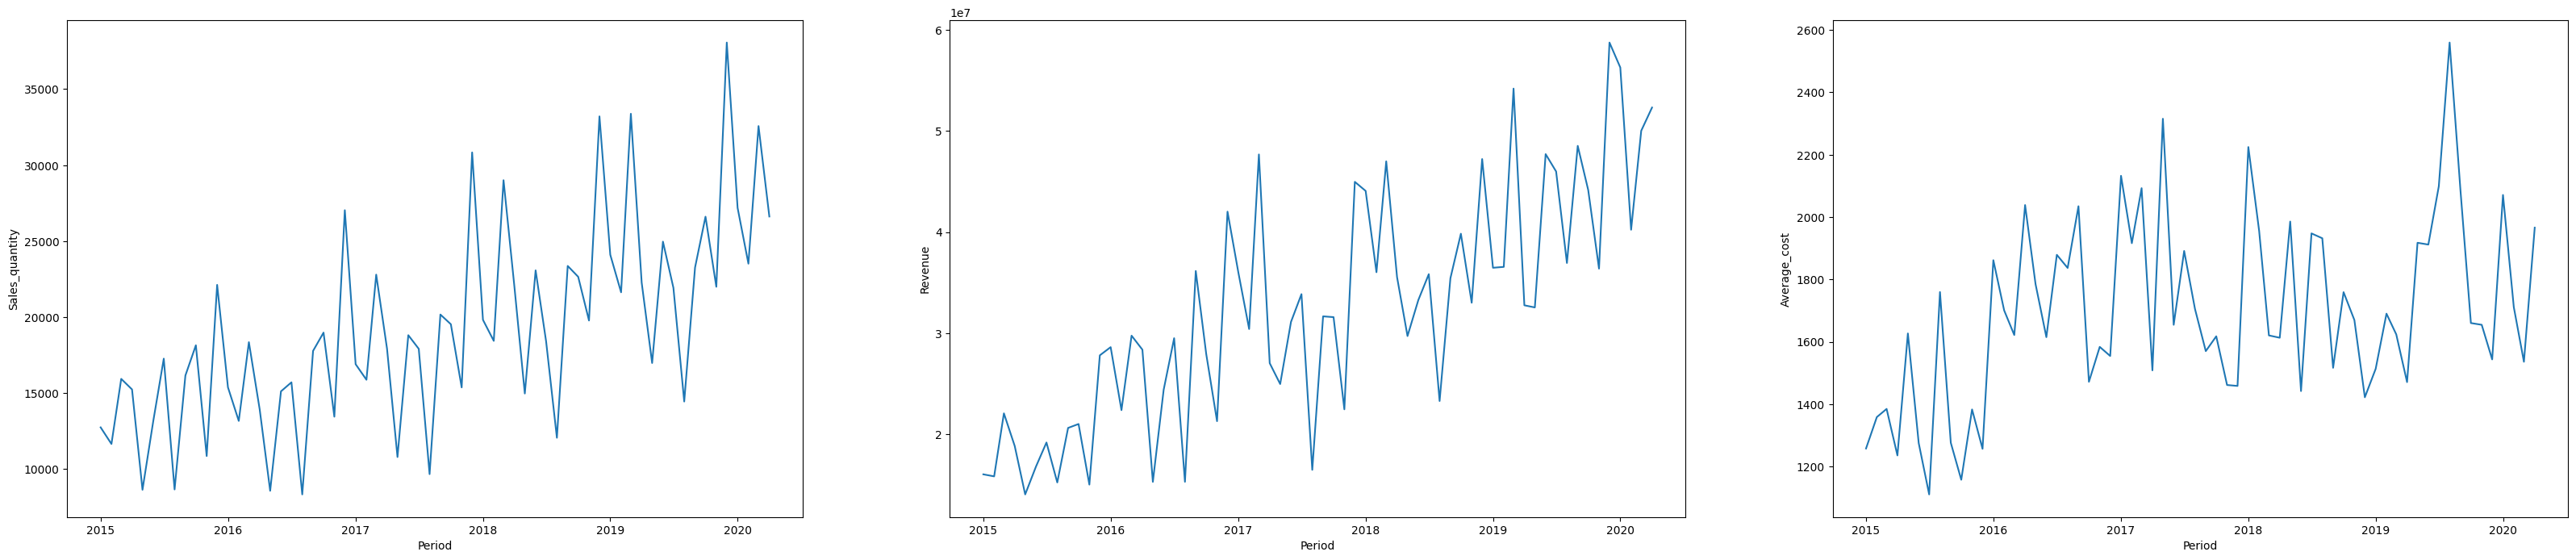

In [12]:
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(40, 8))

dataset['Period'] = pd.to_datetime(dataset['Period'], dayfirst=True)

sns.lineplot(x="Period", y="Sales_quantity", data=dataset, ax=ax[0])
sns.lineplot(x="Period", y="Revenue", data=dataset, ax=ax[1])
sns.lineplot(x="Period", y="Average_cost", data=dataset, ax=ax[2])

plt.show();

<Axes: xlabel='Period', ylabel='Revenue'>

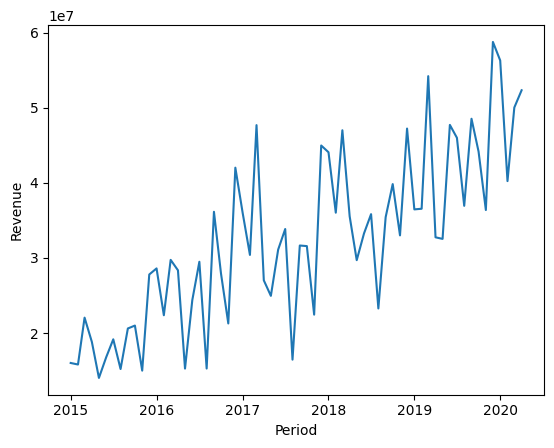

In [13]:
sns.lineplot(x="Period", y="Revenue", data=dataset)

In [14]:
dataset

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,2019-12-01,5.875647e+07,38069.0,1543.420464,29878525.0
60,2020-01-01,5.628830e+07,27184.0,2070.640850,29044998.0
61,2020-02-01,4.022524e+07,23509.0,1711.057181,29044998.0
62,2020-03-01,5.002217e+07,32569.0,1535.882748,29044998.0


In [15]:
timesteps = pd.Series(dataset['Period'])
revenue = pd.Series(dataset['Revenue'])

In [16]:
timesteps

0    2015-01-01
1    2015-02-01
2    2015-03-01
3    2015-04-01
4    2015-05-01
        ...    
59   2019-12-01
60   2020-01-01
61   2020-02-01
62   2020-03-01
63   2020-04-01
Name: Period, Length: 64, dtype: datetime64[ns]

In [17]:
timesteps = timesteps.to_numpy()
timesteps

array(['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01

In [18]:
revenue

0     1.601007e+07
1     1.580759e+07
2     2.204715e+07
3     1.881458e+07
4     1.402148e+07
          ...     
59    5.875647e+07
60    5.628830e+07
61    4.022524e+07
62    5.002217e+07
63    5.232069e+07
Name: Revenue, Length: 64, dtype: float64

In [19]:
revenue_mm = [r/1000000 for r in revenue.to_numpy()]
revenue_mm[:10]

[16.0100721195,
 15.807587449808,
 22.047146023644,
 18.81458329428,
 14.021479611678,
 16.783928522112,
 19.161892194872,
 15.204984296742,
 20.6039399751,
 20.992874780136]

In [20]:
split = int(0.8 * len(timesteps)) # 80% train-test split

# Create the train and test splits
X_train, y_train = timesteps[:split], revenue_mm[:split]
X_test, y_test = timesteps[split:], revenue_mm[split:]

In [21]:
# Setup global vars for WINDOW and HORIZON
HORIZON = 1
WINDOW = 7

# Functionize windowing of labels
def get_labeled_windows(x, horizon=HORIZON):
  '''
  Create labels for windowed dataset.

    E.g., if horizon = 1
    Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7]
  '''

  return x[:, :-horizon], x[:, -horizon:]

Let's check to make sure we've split the data the correct way before doing any training...

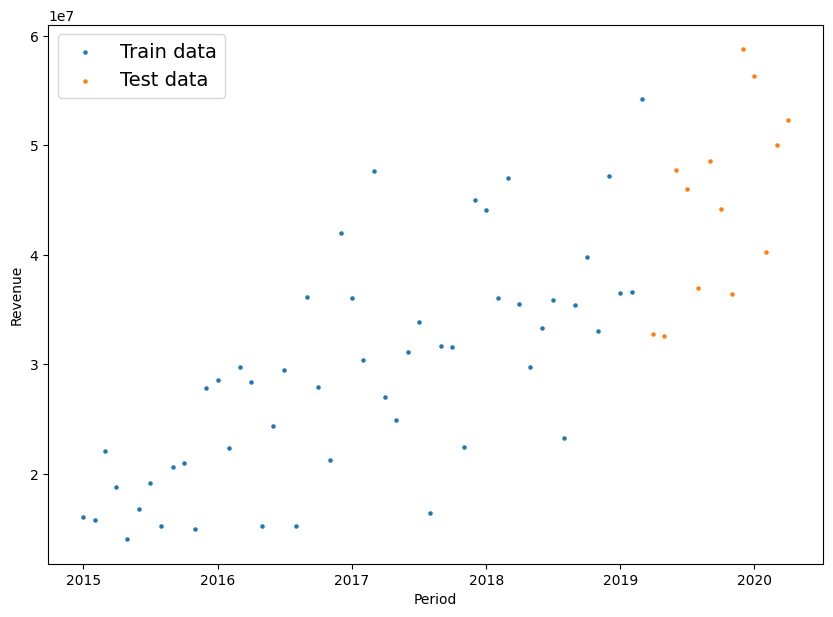

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(dataset["Period"][:split],
            dataset["Revenue"][:split],
            s=5, label="Train data")
plt.scatter(dataset["Period"][split:],
            dataset["Revenue"][split:],
            s=5, label="Test data")
plt.xlabel("Period")
plt.ylabel("Revenue")
plt.legend(fontsize=14)
plt.show();

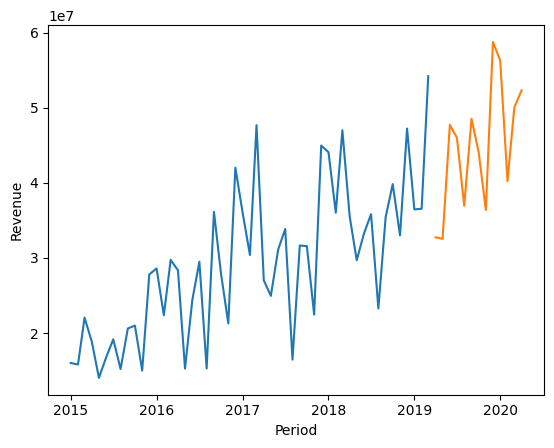

In [23]:
sns.lineplot(x=dataset["Period"][:split], y=dataset["Revenue"][:split]);
sns.lineplot(x=dataset["Period"][split:], y=dataset["Revenue"][split:]);

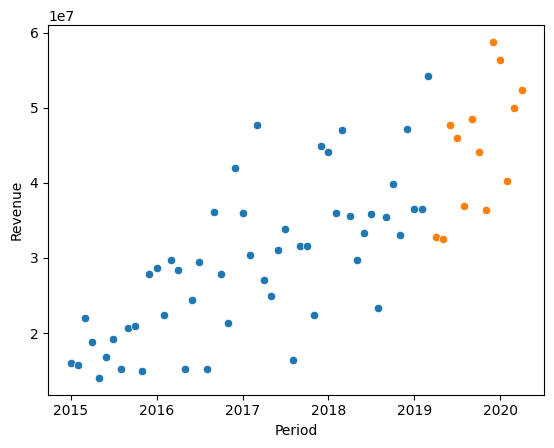

In [24]:
sns.scatterplot(x=dataset["Period"][:split], y=dataset["Revenue"][:split]);
sns.scatterplot(x=dataset["Period"][split:], y=dataset["Revenue"][split:]);

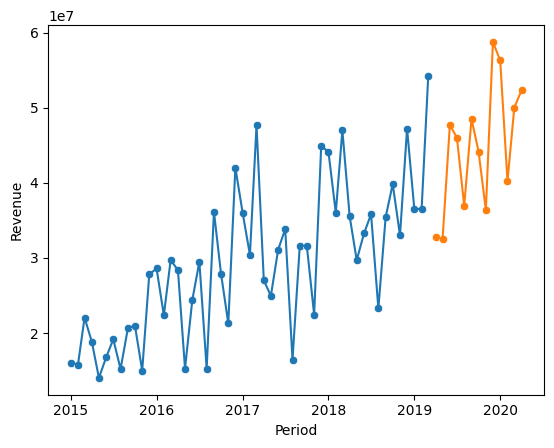

In [25]:
# Combined line and scatter plots to show the split was done correctly
sns.lineplot(x=dataset["Period"][:split], y=dataset["Revenue"][:split]);
sns.lineplot(x=dataset["Period"][split:], y=dataset["Revenue"][split:]);
sns.scatterplot(x=dataset["Period"][:split], y=dataset["Revenue"][:split]);
sns.scatterplot(x=dataset["Period"][split:], y=dataset["Revenue"][split:]);

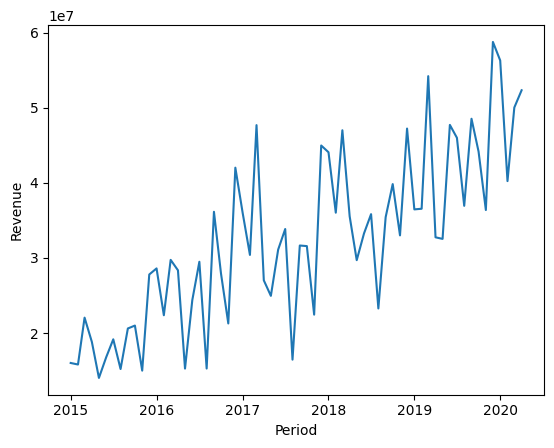

In [26]:
# Here is the full, unsplit original as a reminder...
sns.lineplot(x="Period", y="Revenue", data=dataset);

Now we need a a reliable way to window and plot our datasets. Let's go ahead and functionize both of these features before trying out a few model architectures.



In [27]:
# Create plotting function for time series data
def plot_ts(timesteps, values, format='-', start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across time).

  Parameters
  ----------
  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start: where to start the plot (setting a value will index from start of timesteps)
  end: where to end the plot (similar to start)
  label: label to show on plot about corresponding value, default None
  """

  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time/Period")
  plt.ylabel("Revenue")
  plt.xticks(rotation=90)

  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

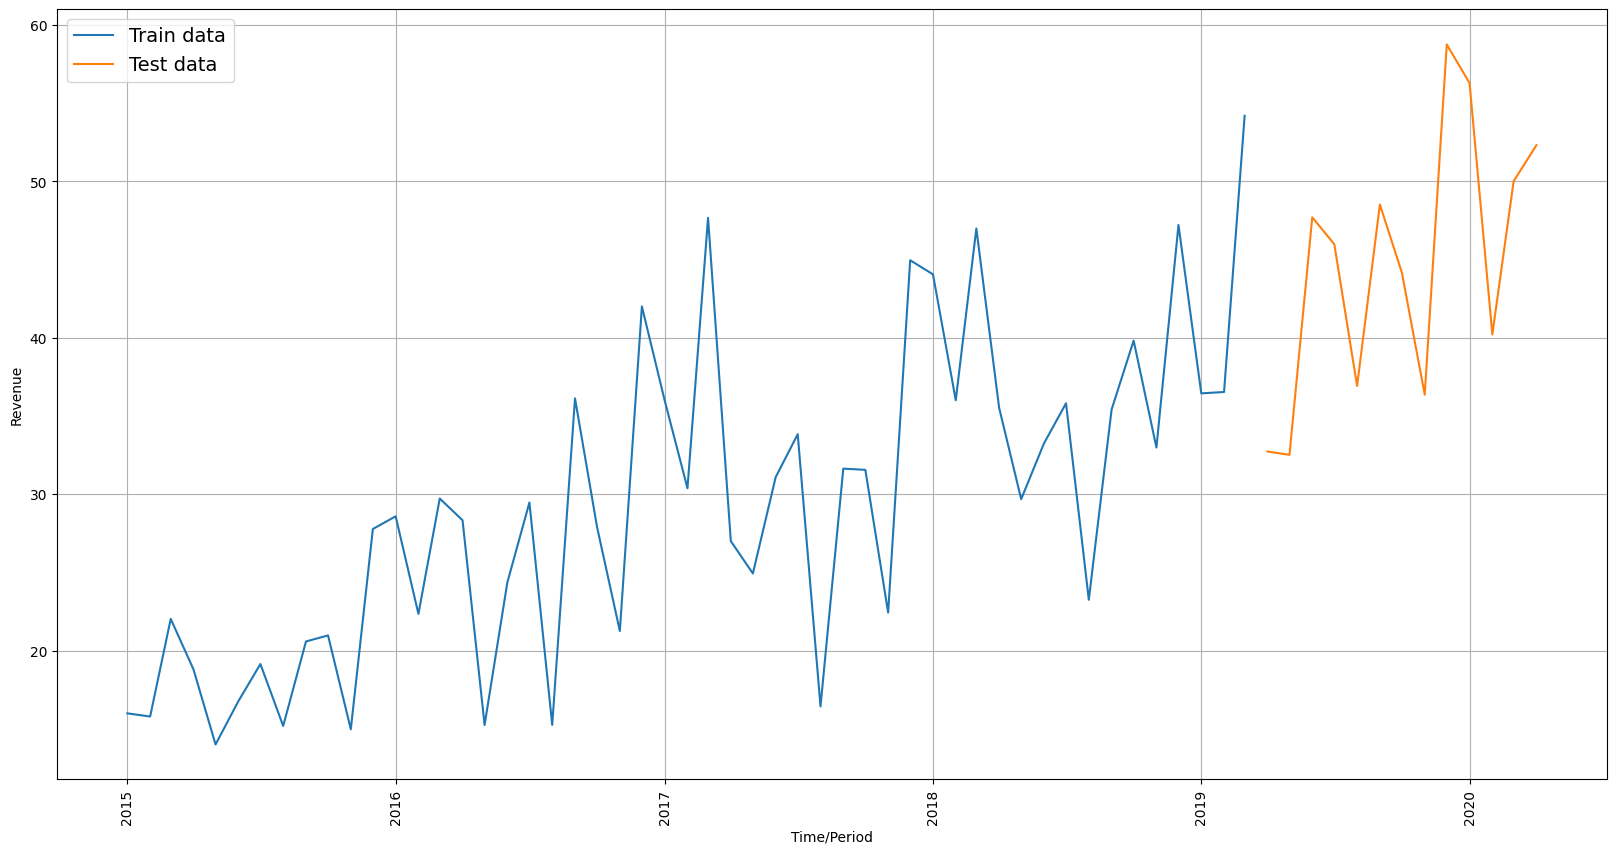

In [28]:
# Let's test it out
plt.figure(figsize=(20, 10))
plot_ts(X_train, y_train, '-', label="Train data")
plot_ts(X_test, y_test, '-', label="Test data")

# Modelling Experiments

Now that we've prepared our data, let's move into a few modelling experiments and see how well they do. We will carry out experiments using the following architectures:

* Naive model (baseline)
* Dense model architectures
* Dense with varying windows and horizons
* Conv1D
* LSTM

Afterward, we will take the best architecture and adapt it to be usable with multivariate data. This will require preprocessing another column or two, creating a new dataset for training, and carrying out multiple predictions per timestep.


To create a baseline, against which we'll test each of our models' performances, we can follow the formula for naive forecasting (i.e., predicting the value of the last timestep as the next timestep):

$$\hat{y}_{t} = y_{t-1}$$

In [29]:
# Create the naive forecast function
naive_forecast = y_test[:-1]

naive_forecast[:5], naive_forecast[-5:]

([32.7439896056,
  32.5316575397,
  47.7097016346,
  45.99214157398001,
  36.933665022],
 [36.3749564944, 58.756473660800005, 56.28830087, 40.225243264, 50.0221652325])

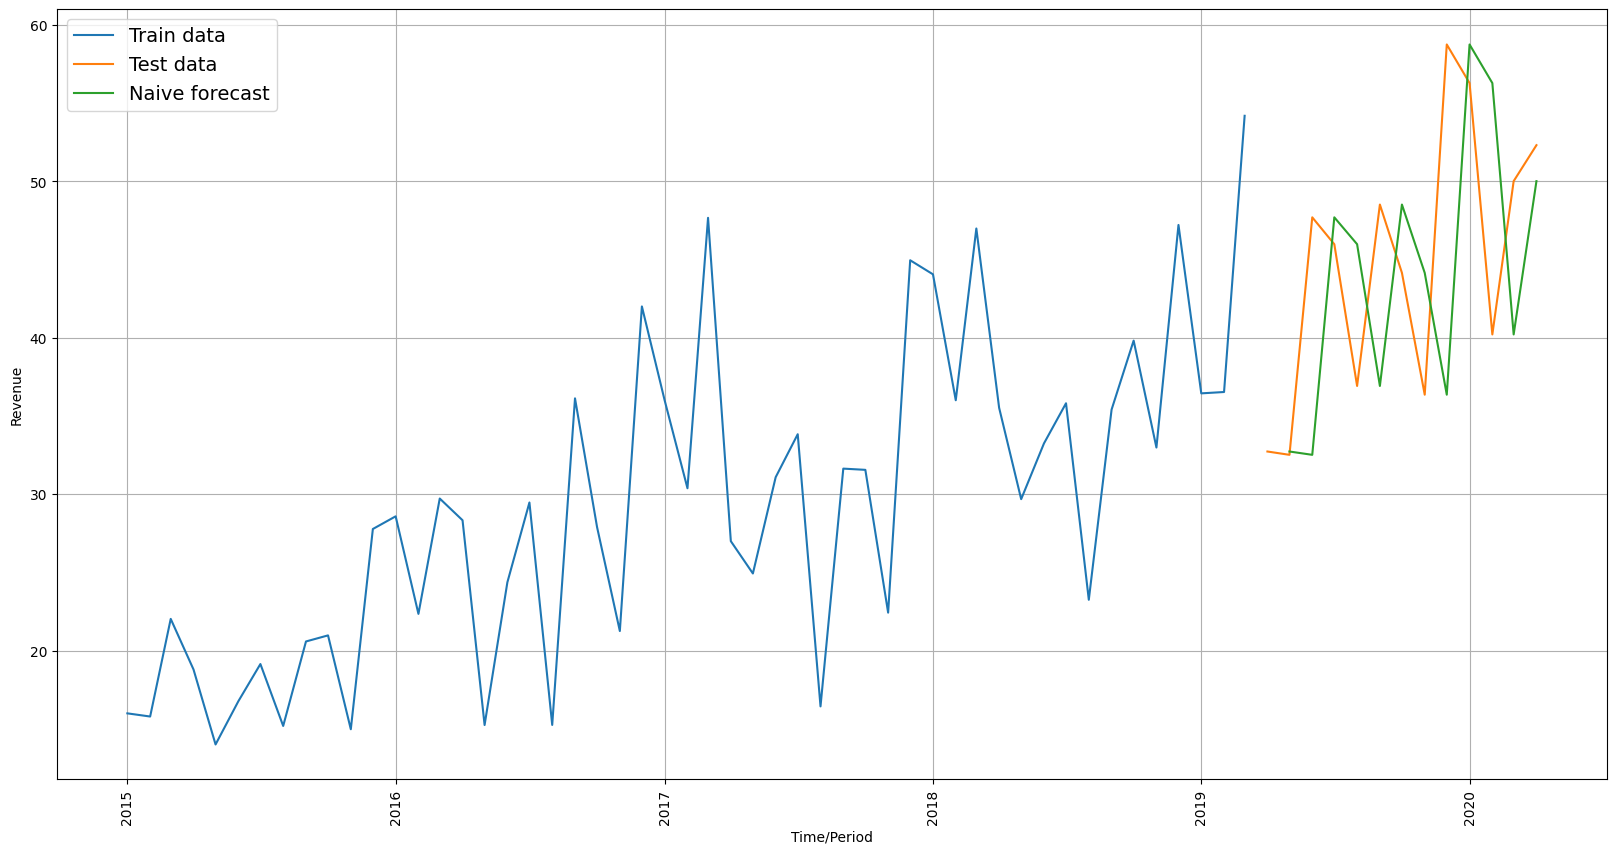

In [30]:
plt.figure(figsize=(20, 10))
plot_ts(X_train, y_train, label="Train data")
plot_ts(X_test, y_test, label="Test data")
plot_ts(X_test[1:], naive_forecast, label="Naive forecast")

# Designating Some Evaluation Metrics

We're predicting a number, so this will be a regression-type problem. Therefore, we'll want to consider some of the following metrics:

* Mean absolute error (MAE)
* Mean squared error (MSE)
* Root mean squared error (RMSE)
* (Scaled) Mean absolute percentage error (sMAPE)
* Mean absolute squared error (MASE)

In [31]:
# MASE implementation
def mean_abs_squared_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of a given dataset).
  """

  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae / mae_naive_no_season

In [32]:
mean_abs_squared_error(y_true=y_test[1:], y_pred=naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9185617593799307>

In [33]:
# Import the rest of the metrics and create eval pipeline function for models

from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_abs_squared_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

Let's create a function to view NumPy arrays as windows...

In [34]:
def make_windows(x, window=WINDOW, horizon=HORIZON):
  """ 
  Turns a 1D array into a 2D array of sequential labelled windows of
  window_size with horizon size labels.
  """

  x = np.squeeze(x)

  # Create window of the specified window size
  window_step = np.expand_dims(np.arange(window + horizon), axis=0)

  # Create 2D array of multiple window steps (minus 1 for 0 indexing)
  window_indices = window_step + np.expand_dims(np.arange(len(x) - (window + horizon - 1)), axis=0).T
  print(f"Window indexes:\n {window_indices, window_indices.shape}")

  window_indices = window_indices.astype(int)

  # Use array produced to index on target array
  windowed_array = x[window_indices]

  # Get the labelled windows
  windows, labels = get_labeled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [35]:
make_windows(revenue_mm, window=WINDOW, horizon=HORIZON)

Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [11, 12, 13, 14, 15, 16, 17, 18],
       [12, 13, 14, 15, 16, 17, 18, 19],
       [13, 14, 15, 16, 17, 18, 19, 20],
       [14, 15, 16, 17, 18, 19, 20, 21],
       [15, 16, 17, 18, 19, 20, 21, 22],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [18, 19, 20, 21, 22, 23, 24, 25],
       [19, 20, 21, 22, 23, 24, 25, 26],
       [20, 21, 22, 23, 24, 25, 26, 27],
       [21, 22, 23, 24, 25, 26, 27, 28],
       [22, 23, 24, 25, 26, 27, 28, 29],
       [23, 24, 25, 26, 27, 28, 29, 30]

(array([[16.01007212, 15.80758745, 22.04714602, 18.81458329, 14.02147961,
         16.78392852, 19.16189219],
        [15.80758745, 22.04714602, 18.81458329, 14.02147961, 16.78392852,
         19.16189219, 15.2049843 ],
        [22.04714602, 18.81458329, 14.02147961, 16.78392852, 19.16189219,
         15.2049843 , 20.60393998],
        [18.81458329, 14.02147961, 16.78392852, 19.16189219, 15.2049843 ,
         20.60393998, 20.99287478],
        [14.02147961, 16.78392852, 19.16189219, 15.2049843 , 20.60393998,
         20.99287478, 14.99336966],
        [16.78392852, 19.16189219, 15.2049843 , 20.60393998, 20.99287478,
         14.99336966, 27.79180764],
        [19.16189219, 15.2049843 , 20.60393998, 20.99287478, 14.99336966,
         27.79180764, 28.6015865 ],
        [15.2049843 , 20.60393998, 20.99287478, 14.99336966, 27.79180764,
         28.6015865 , 22.36707407],
        [20.60393998, 20.99287478, 14.99336966, 27.79180764, 28.6015865 ,
         22.36707407, 29.73860857],
        [2

In [36]:
# Looks like it worked. Let's use it now
full_windows, full_labels = make_windows(revenue_mm, WINDOW, HORIZON)

Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [11, 12, 13, 14, 15, 16, 17, 18],
       [12, 13, 14, 15, 16, 17, 18, 19],
       [13, 14, 15, 16, 17, 18, 19, 20],
       [14, 15, 16, 17, 18, 19, 20, 21],
       [15, 16, 17, 18, 19, 20, 21, 22],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [18, 19, 20, 21, 22, 23, 24, 25],
       [19, 20, 21, 22, 23, 24, 25, 26],
       [20, 21, 22, 23, 24, 25, 26, 27],
       [21, 22, 23, 24, 25, 26, 27, 28],
       [22, 23, 24, 25, 26, 27, 28, 29],
       [23, 24, 25, 26, 27, 28, 29, 30]

In [37]:
len(full_windows), len(full_labels)

(57, 57)

In [38]:
# View last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label {full_labels[i-3]}")

Window: [45.99214157 36.93366502 48.52626013 44.16041618 36.37495649 58.75647366
 56.28830087] -> Label [40.22524326]
Window: [36.93366502 48.52626013 44.16041618 36.37495649 58.75647366 56.28830087
 40.22524326] -> Label [50.02216523]
Window: [48.52626013 44.16041618 36.37495649 58.75647366 56.28830087 40.22524326
 50.02216523] -> Label [52.32069294]


In [39]:
revenue_mm[-1]

52.3206929428

Perfect - it worked. Now just two more things to do:

1. Turn our windows into training and test sets, and
2. Create some modelling callbacks

In [40]:
# Make train-test splits
def split_windows(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """

  split_size = int(len(windows) * (1-test_split)) # default to an 80-20 tr-ts split
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, train_labels, test_windows, test_labels

In [41]:
# Create train-test windows with new function
train_windows, train_labels, test_windows, test_labels = split_windows(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(45, 45, 12, 12)

In [42]:
train_windows[:5], test_windows[:5]

(array([[16.01007212, 15.80758745, 22.04714602, 18.81458329, 14.02147961,
         16.78392852, 19.16189219],
        [15.80758745, 22.04714602, 18.81458329, 14.02147961, 16.78392852,
         19.16189219, 15.2049843 ],
        [22.04714602, 18.81458329, 14.02147961, 16.78392852, 19.16189219,
         15.2049843 , 20.60393998],
        [18.81458329, 14.02147961, 16.78392852, 19.16189219, 15.2049843 ,
         20.60393998, 20.99287478],
        [14.02147961, 16.78392852, 19.16189219, 15.2049843 , 20.60393998,
         20.99287478, 14.99336966]]),
 array([[39.8315657 , 32.99914521, 47.2218282 , 36.45996009, 36.54649866,
         54.19870672, 32.74398961],
        [32.99914521, 47.2218282 , 36.45996009, 36.54649866, 54.19870672,
         32.74398961, 32.53165754],
        [47.2218282 , 36.45996009, 36.54649866, 54.19870672, 32.74398961,
         32.53165754, 47.70970163],
        [36.45996009, 36.54649866, 54.19870672, 32.74398961, 32.53165754,
         47.70970163, 45.99214157],
        

In [43]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON]), y_train[WINDOW:])

True

### Create Some Model Callbacks

We are going to use the following:

* TensorBoard callbacks
* Model checkpoint callback
* ReduceLROnPlateau
* EarlyStopping callback (monitor 'val_loss')

In [44]:
# Create modelling checkpoint to save the best model weights during training
import os
import datetime

# Functionize implementation of checkpoint cb with specific filenames
def create_model_checkpoint(model_name, save_path="/content/model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,
                                                                  model_name),
                                            monitor='val_loss',
                                            verbose=False,
                                            save_best_only=True)
  
logs = "/content/model_experiments"

def create_tb_callback(dir_name, experiment_name):

  log_dir = dir_name + "/" + experiment_name
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# We will use this AFTER we identify a more optimal learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.9**epoch)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.05,
                                                 patience=3,
                                                 verbose=False)

# Dense Models

In [45]:
dense_1 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON, 'linear')
], name='dense_1')

dense_1.compile(loss=tf.keras.losses.mae,
                optimizer='adam',
                metrics=['mae', 'mse'])

tb_dense_1 = create_tb_callback(logs, experiment_name=dense_1.name)
checkpoint = create_model_checkpoint(dense_1.name)

history_dense_1 = dense_1.fit(train_windows, train_labels, epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[tb_dense_1, checkpoint])

Saving TensorBoard log files to: /content/model_experiments/dense_1
Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 24.2041 - mae: 24.2041 - mse: 681.6367

2/2 [==============================] - 2s 1s/step - loss: 23.6835 - mae: 23.6835 - mse: 636.8444 - val_loss: 31.1420 - val_mae: 31.1420 - val_mse: 1030.0450
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 19.0238 - mae: 19.0238 - mse: 415.5911

2/2 [==============================] - 1s 637ms/step - loss: 20.2365 - mae: 20.2365 - mse: 476.6982 - val_loss: 25.9888 - val_mae: 25.9888 - val_mse: 734.4222
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 15.4283 - mae: 15.4283 - mse: 290.8331

2/2 [==============================] - 1s 647ms/step - loss: 16.6642 - mae: 16.6642 - mse: 341.2837 - val_loss: 20.7787 - val_mae: 20.7787 - val_mse: 489.4402
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 13.6851 - mae: 13.6851 - mse: 240.8513

2/2 [==============================] - 1s 647ms/step - loss: 13.3061 - mae: 13.3061 - mse: 237.8198 - val_loss: 15.4960 - val_mae: 15.4960 - val_mse: 296.4991
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 10.5981 - mae: 10.5981 - mse: 156.0823

2/2 [==============================] - 1s 652ms/step - loss: 10.4282 - mae: 10.4282 - mse: 157.0024 - val_loss: 10.1725 - val_mae: 10.1725 - val_mse: 158.6314
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 8.6788 - mae: 8.6788 - mse: 113.5088

2/2 [==============================] - 1s 700ms/step - loss: 8.1557 - mae: 8.1557 - mse: 105.8221 - val_loss: 7.8864 - val_mae: 7.8864 - val_mse: 81.3839
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1848 - mae: 6.1848 - mse: 67.1678

2/2 [==============================] - 1s 665ms/step - loss: 6.7989 - mae: 6.7989 - mse: 76.4885 - val_loss: 6.3375 - val_mae: 6.3375 - val_mse: 53.8763
Epoch 8/100
1/2 [==============>...............] - ETA: 0s - loss: 6.7385 - mae: 6.7385 - mse: 73.7581

2/2 [==============================] - 1s 627ms/step - loss: 6.6420 - mae: 6.6420 - mse: 69.7152 - val_loss: 6.0452 - val_mae: 6.0452 - val_mse: 56.7933
Epoch 9/100
2/2 [==============================] - 0s 47ms/step - loss: 7.1181 - mae: 7.1181 - mse: 75.2500 - val_loss: 6.4599 - val_mae: 6.4599 - val_mse: 66.8308
Epoch 10/100
2/2 [==============================] - 0s 61ms/step - loss: 7.5356 - mae: 7.5356 - mse: 81.5228 - val_loss: 6.5948 - val_mae: 6.5948 - val_mse: 70.8563
Epoch 11/100
2/2 [==============================] - 0s 44ms/step - loss: 7.5424 - mae: 7.5424 - mse: 81.6245 - val_loss: 6.3428 - val_mae: 6.3428 - val_mse: 65.3747
Epoch 12/100
1/2 [==============>...............] - ETA: 0s - loss: 7.1276 - mae: 7.1276 - mse: 76.9637

2/2 [==============================] - 1s 640ms/step - loss: 7.3057 - mae: 7.3057 - mse: 77.5282 - val_loss: 6.0367 - val_mae: 6.0367 - val_mse: 56.6612
Epoch 13/100
1/2 [==============>...............] - ETA: 0s - loss: 7.4149 - mae: 7.4149 - mse: 78.2394

2/2 [==============================] - 1s 604ms/step - loss: 6.9163 - mae: 6.9163 - mse: 71.2548 - val_loss: 5.7789 - val_mae: 5.7789 - val_mse: 49.6138
Epoch 14/100
2/2 [==============================] - 0s 45ms/step - loss: 6.5337 - mae: 6.5337 - mse: 65.6197 - val_loss: 5.8436 - val_mae: 5.8436 - val_mse: 47.7227
Epoch 15/100
2/2 [==============================] - 0s 63ms/step - loss: 6.1736 - mae: 6.1736 - mse: 62.9279 - val_loss: 6.3826 - val_mae: 6.3826 - val_mse: 51.9808
Epoch 16/100
2/2 [==============================] - 0s 44ms/step - loss: 6.1408 - mae: 6.1408 - mse: 63.0546 - val_loss: 6.7881 - val_mae: 6.7881 - val_mse: 58.8453
Epoch 17/100
2/2 [==============================] - 0s 60ms/step - loss: 6.2687 - mae: 6.2687 - mse: 65.6478 - val_loss: 6.9419 - val_mae: 6.9419 - val_mse: 62.6894
Epoch 18/100
2/2 [==============================] - 0s 47ms/step - loss: 6.2378 - mae: 6.2378 - mse: 65.4081 - val_loss: 6.8379 - val_mae: 6.8379 - val_mse: 60.8596
Epoch 19/100
2/2 [====

2/2 [==============================] - 1s 628ms/step - loss: 5.9170 - mae: 5.9170 - mse: 58.0736 - val_loss: 5.6276 - val_mae: 5.6276 - val_mse: 44.2050
Epoch 23/100
1/2 [==============>...............] - ETA: 0s - loss: 5.1677 - mae: 5.1677 - mse: 46.5786

2/2 [==============================] - 1s 806ms/step - loss: 5.9320 - mae: 5.9320 - mse: 57.6335 - val_loss: 5.5084 - val_mae: 5.5084 - val_mse: 42.8868
Epoch 24/100
1/2 [==============>...............] - ETA: 0s - loss: 6.7323 - mae: 6.7323 - mse: 69.1374

2/2 [==============================] - 1s 979ms/step - loss: 5.9289 - mae: 5.9289 - mse: 56.9833 - val_loss: 5.4631 - val_mae: 5.4631 - val_mse: 42.3681
Epoch 25/100
1/2 [==============>...............] - ETA: 0s - loss: 6.6777 - mae: 6.6777 - mse: 67.5381

2/2 [==============================] - 2s 2s/step - loss: 5.9074 - mae: 5.9074 - mse: 56.3855 - val_loss: 5.4530 - val_mae: 5.4530 - val_mse: 42.1281
Epoch 26/100
2/2 [==============================] - 0s 94ms/step - loss: 5.8622 - mae: 5.8622 - mse: 55.6390 - val_loss: 5.4681 - val_mae: 5.4681 - val_mse: 42.1370
Epoch 27/100
2/2 [==============================] - 0s 64ms/step - loss: 5.8199 - mae: 5.8199 - mse: 55.3321 - val_loss: 5.5136 - val_mae: 5.5136 - val_mse: 42.7041
Epoch 28/100
2/2 [==============================] - 0s 78ms/step - loss: 5.7693 - mae: 5.7693 - mse: 54.8108 - val_loss: 5.5522 - val_mae: 5.5522 - val_mse: 43.3856
Epoch 29/100
2/2 [==============================] - 0s 99ms/step - loss: 5.7415 - mae: 5.7415 - mse: 54.0180 - val_loss: 5.5382 - val_mae: 5.5382 - val_mse: 43.1534
Epoch 30/100
2/2 [==============================] - 0s 92ms/step - loss: 5.6950 - mae: 5.6950 - mse: 53.2669 - val_loss: 5.4827 - val_mae: 5.4827 - val_mse: 42.3018
Epoch 31/100
1/2 [=======

2/2 [==============================] - 1s 837ms/step - loss: 5.6663 - mae: 5.6663 - mse: 52.4464 - val_loss: 5.4105 - val_mae: 5.4105 - val_mse: 41.6966
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 5.2387 - mae: 5.2387 - mse: 45.4185

2/2 [==============================] - 1s 675ms/step - loss: 5.6594 - mae: 5.6594 - mse: 51.9525 - val_loss: 5.4076 - val_mae: 5.4076 - val_mse: 41.6872
Epoch 33/100
2/2 [==============================] - 0s 67ms/step - loss: 5.6606 - mae: 5.6606 - mse: 51.5426 - val_loss: 5.4182 - val_mae: 5.4182 - val_mse: 41.8477
Epoch 34/100
2/2 [==============================] - 0s 48ms/step - loss: 5.6506 - mae: 5.6506 - mse: 51.3151 - val_loss: 5.4272 - val_mae: 5.4272 - val_mse: 42.0287
Epoch 35/100
2/2 [==============================] - 0s 64ms/step - loss: 5.5966 - mae: 5.5966 - mse: 50.6346 - val_loss: 5.4329 - val_mae: 5.4329 - val_mse: 42.3479
Epoch 36/100
2/2 [==============================] - 0s 63ms/step - loss: 5.5283 - mae: 5.5283 - mse: 50.0023 - val_loss: 5.5229 - val_mae: 5.5229 - val_mse: 43.2503
Epoch 37/100
2/2 [==============================] - 0s 68ms/step - loss: 5.5101 - mae: 5.5101 - mse: 49.6580 - val_loss: 5.6255 - val_mae: 5.6255 - val_mse: 44.9134
Epoch 38/100
2/2 [====

In [46]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 8.576542,
 'mse': 116.31625,
 'rmse': 10.785002,
 'mape': 18.524485,
 'mase': 0.9185617}

In [47]:
dense_1.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 41ms/step - loss: 5.7411 - mae: 5.7411 - mse: 47.6008


[5.741077423095703, 5.741077423095703, 47.60081100463867]

In [48]:
dense_1 = tf.keras.models.load_model('/content/model_experiments/dense_1')
dense_1.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 157ms/step - loss: 5.4076 - mae: 5.4076 - mse: 41.6872


[5.407561779022217, 5.407561779022217, 41.68718719482422]

Let's find a more optimal learning rate, too, so that we can start using our LR callbacks and potentially improve our future models.

Text(0.5, 1.0, 'Find the Ideal LR')

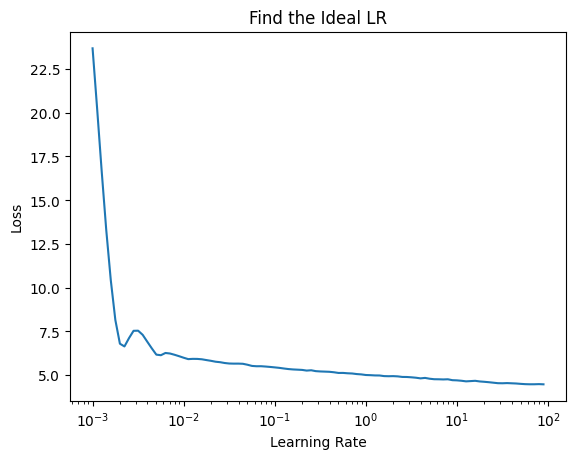

In [49]:
lrs = 1e-3 * 10**(tf.range(100)/20)
plt.semilogx(lrs, history_dense_1.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Find the Ideal LR")

Based on the graph, we could safely move forward with future experiments using a default learning rate of about **0.007**.

Let's run it again with this learning rate and see how it does with callbacks included.

In [50]:
dense_2 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON, 'linear')
], name='dense_2')

dense_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.007),
                metrics=['mae', 'mse'])

tb_dense_2 = create_tb_callback(logs, experiment_name=dense_2.name)
checkpoint2 = create_model_checkpoint(dense_2.name)

history_dense_2 = dense_2.fit(train_windows, train_labels, epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[tb_dense_2, 
                                         checkpoint2,
                                         lr_scheduler,
                                         reduce_lr])

Saving TensorBoard log files to: /content/model_experiments/dense_2
Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 43.5412 - mae: 43.5412 - mse: 2016.4877

2/2 [==============================] - 1s 798ms/step - loss: 42.2456 - mae: 42.2456 - mse: 1912.6917 - val_loss: 58.4045 - val_mae: 58.4045 - val_mse: 3497.8967 - lr: 0.0010
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 41.1828 - mae: 41.1828 - mse: 1798.7866

2/2 [==============================] - 1s 637ms/step - loss: 38.8828 - mae: 38.8828 - mse: 1632.6802 - val_loss: 54.0180 - val_mae: 54.0180 - val_mse: 3002.2012 - lr: 9.0000e-04
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 36.9008 - mae: 36.9008 - mse: 1476.3198

2/2 [==============================] - 1s 654ms/step - loss: 35.9187 - mae: 35.9187 - mse: 1400.2921 - val_loss: 50.0420 - val_mae: 50.0420 - val_mse: 2586.1458 - lr: 8.1000e-04
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 33.9557 - mae: 33.9557 - mse: 1267.7731

2/2 [==============================] - 1s 690ms/step - loss: 33.1709 - mae: 33.1709 - mse: 1203.3204 - val_loss: 46.4177 - val_mae: 46.4177 - val_mse: 2234.2236 - lr: 7.2900e-04
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 31.2361 - mae: 31.2361 - mse: 1068.1713

2/2 [==============================] - 1s 712ms/step - loss: 30.6899 - mae: 30.6899 - mse: 1038.9253 - val_loss: 43.0928 - val_mae: 43.0928 - val_mse: 1934.6586 - lr: 6.5610e-04
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 26.8935 - mae: 26.8935 - mse: 798.7153

2/2 [==============================] - 1s 722ms/step - loss: 28.4651 - mae: 28.4651 - mse: 899.4377 - val_loss: 40.0395 - val_mae: 40.0395 - val_mse: 1679.2006 - lr: 5.9049e-04
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 27.6701 - mae: 27.6701 - mse: 847.2881

2/2 [==============================] - 1s 1s/step - loss: 26.4456 - mae: 26.4456 - mse: 788.6045 - val_loss: 37.2561 - val_mae: 37.2561 - val_mse: 1462.4720 - lr: 5.3144e-04
Epoch 8/100
1/2 [==============>...............] - ETA: 0s - loss: 24.4745 - mae: 24.4745 - mse: 686.7041

2/2 [==============================] - 1s 736ms/step - loss: 24.5844 - mae: 24.5844 - mse: 689.2625 - val_loss: 34.7200 - val_mae: 34.7200 - val_mse: 1278.8551 - lr: 4.7830e-04
Epoch 9/100
1/2 [==============>...............] - ETA: 0s - loss: 24.6590 - mae: 24.6590 - mse: 682.6553

2/2 [==============================] - 2s 2s/step - loss: 22.9175 - mae: 22.9175 - mse: 609.9570 - val_loss: 32.4136 - val_mae: 32.4136 - val_mse: 1123.2511 - lr: 4.3047e-04
Epoch 10/100
1/2 [==============>...............] - ETA: 0s - loss: 20.3738 - mae: 20.3738 - mse: 487.9988

2/2 [==============================] - 4s 4s/step - loss: 21.4051 - mae: 21.4051 - mse: 537.9086 - val_loss: 30.3265 - val_mae: 30.3265 - val_mse: 991.7263 - lr: 3.8742e-04
Epoch 11/100
1/2 [==============>...............] - ETA: 0s - loss: 21.5625 - mae: 21.5625 - mse: 546.1927

2/2 [==============================] - 1s 885ms/step - loss: 20.0336 - mae: 20.0336 - mse: 482.2338 - val_loss: 28.4342 - val_mae: 28.4342 - val_mse: 880.0143 - lr: 3.4868e-04
Epoch 12/100
1/2 [==============>...............] - ETA: 0s - loss: 19.6140 - mae: 19.6140 - mse: 461.9119

2/2 [==============================] - 1s 662ms/step - loss: 18.8123 - mae: 18.8123 - mse: 431.4069 - val_loss: 26.7282 - val_mae: 26.7282 - val_mse: 785.5270 - lr: 3.1381e-04
Epoch 13/100
1/2 [==============>...............] - ETA: 0s - loss: 18.9125 - mae: 18.9125 - mse: 433.1286

2/2 [==============================] - 1s 683ms/step - loss: 17.7303 - mae: 17.7303 - mse: 390.0540 - val_loss: 25.1942 - val_mae: 25.1942 - val_mse: 705.6021 - lr: 2.8243e-04
Epoch 14/100
1/2 [==============>...............] - ETA: 0s - loss: 19.0549 - mae: 19.0549 - mse: 419.8760

2/2 [==============================] - 1s 682ms/step - loss: 16.8027 - mae: 16.8027 - mse: 355.3716 - val_loss: 23.8077 - val_mae: 23.8077 - val_mse: 637.4456 - lr: 2.5419e-04
Epoch 15/100
1/2 [==============>...............] - ETA: 0s - loss: 16.2042 - mae: 16.2042 - mse: 335.9952

2/2 [==============================] - 1s 668ms/step - loss: 15.9137 - mae: 15.9137 - mse: 323.5334 - val_loss: 22.5628 - val_mae: 22.5628 - val_mse: 579.5421 - lr: 2.2877e-04
Epoch 16/100
1/2 [==============>...............] - ETA: 0s - loss: 14.2755 - mae: 14.2755 - mse: 271.1160

2/2 [==============================] - 1s 626ms/step - loss: 15.1345 - mae: 15.1345 - mse: 297.1572 - val_loss: 21.4403 - val_mae: 21.4403 - val_mse: 530.0142 - lr: 2.0589e-04
Epoch 17/100
1/2 [==============>...............] - ETA: 0s - loss: 16.2129 - mae: 16.2129 - mse: 332.3118

2/2 [==============================] - 1s 622ms/step - loss: 14.5109 - mae: 14.5109 - mse: 276.7577 - val_loss: 20.4363 - val_mae: 20.4363 - val_mse: 487.8533 - lr: 1.8530e-04
Epoch 18/100
1/2 [==============>...............] - ETA: 0s - loss: 13.9676 - mae: 13.9676 - mse: 257.6949

2/2 [==============================] - 1s 687ms/step - loss: 13.9233 - mae: 13.9233 - mse: 256.7664 - val_loss: 19.5485 - val_mae: 19.5485 - val_mse: 452.2495 - lr: 1.6677e-04
Epoch 19/100
1/2 [==============>...............] - ETA: 0s - loss: 13.3439 - mae: 13.3439 - mse: 244.3675

2/2 [==============================] - 1s 694ms/step - loss: 13.4427 - mae: 13.4427 - mse: 240.9508 - val_loss: 18.7481 - val_mae: 18.7481 - val_mse: 421.5137 - lr: 1.5009e-04
Epoch 20/100
1/2 [==============>...............] - ETA: 0s - loss: 14.5868 - mae: 14.5868 - mse: 280.6763

2/2 [==============================] - 1s 610ms/step - loss: 13.0190 - mae: 13.0190 - mse: 228.2094 - val_loss: 18.0269 - val_mae: 18.0269 - val_mse: 394.8848 - lr: 1.3509e-04
Epoch 21/100
1/2 [==============>...............] - ETA: 0s - loss: 12.5728 - mae: 12.5728 - mse: 216.5302

2/2 [==============================] - 1s 614ms/step - loss: 12.6251 - mae: 12.6251 - mse: 215.7036 - val_loss: 17.3812 - val_mae: 17.3812 - val_mse: 371.9291 - lr: 1.2158e-04
Epoch 22/100
1/2 [==============>...............] - ETA: 0s - loss: 14.0259 - mae: 14.0259 - mse: 245.7282

2/2 [==============================] - 1s 606ms/step - loss: 12.2940 - mae: 12.2940 - mse: 206.3338 - val_loss: 16.8041 - val_mae: 16.8041 - val_mse: 352.1270 - lr: 1.0942e-04
Epoch 23/100
1/2 [==============>...............] - ETA: 0s - loss: 11.4503 - mae: 11.4503 - mse: 176.5031

2/2 [==============================] - 1s 638ms/step - loss: 11.9596 - mae: 11.9596 - mse: 196.6781 - val_loss: 16.2929 - val_mae: 16.2929 - val_mse: 335.1523 - lr: 9.8477e-05
Epoch 24/100
1/2 [==============>...............] - ETA: 0s - loss: 11.3015 - mae: 11.3015 - mse: 173.7716

2/2 [==============================] - 1s 1s/step - loss: 11.6778 - mae: 11.6778 - mse: 189.2267 - val_loss: 15.8290 - val_mae: 15.8290 - val_mse: 320.2080 - lr: 8.8629e-05
Epoch 25/100
1/2 [==============>...............] - ETA: 0s - loss: 10.1522 - mae: 10.1522 - mse: 158.3451

2/2 [==============================] - 1s 897ms/step - loss: 11.4308 - mae: 11.4308 - mse: 182.6381 - val_loss: 15.4063 - val_mae: 15.4063 - val_mse: 306.9530 - lr: 7.9766e-05
Epoch 26/100
1/2 [==============>...............] - ETA: 0s - loss: 11.3511 - mae: 11.3511 - mse: 175.9384

2/2 [==============================] - 1s 991ms/step - loss: 11.2130 - mae: 11.2130 - mse: 177.0746 - val_loss: 15.0266 - val_mae: 15.0266 - val_mse: 295.3484 - lr: 7.1790e-05
Epoch 27/100
1/2 [==============>...............] - ETA: 0s - loss: 10.9334 - mae: 10.9334 - mse: 174.3456

2/2 [==============================] - 1s 972ms/step - loss: 11.0289 - mae: 11.0289 - mse: 172.0426 - val_loss: 14.6852 - val_mae: 14.6852 - val_mse: 285.1634 - lr: 6.4611e-05
Epoch 28/100
1/2 [==============>...............] - ETA: 0s - loss: 11.3278 - mae: 11.3278 - mse: 174.9391

2/2 [==============================] - 1s 889ms/step - loss: 10.8629 - mae: 10.8629 - mse: 167.6657 - val_loss: 14.3840 - val_mae: 14.3840 - val_mse: 276.3727 - lr: 5.8150e-05
Epoch 29/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6926 - mae: 9.6926 - mse: 150.0795

2/2 [==============================] - 1s 852ms/step - loss: 10.7178 - mae: 10.7178 - mse: 163.6946 - val_loss: 14.1173 - val_mae: 14.1173 - val_mse: 268.7325 - lr: 5.2335e-05
Epoch 30/100
1/2 [==============>...............] - ETA: 0s - loss: 11.2132 - mae: 11.2132 - mse: 184.0708

2/2 [==============================] - 1s 668ms/step - loss: 10.5941 - mae: 10.5941 - mse: 160.5667 - val_loss: 13.8784 - val_mae: 13.8784 - val_mse: 262.0115 - lr: 4.7101e-05
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 10.0066 - mae: 10.0066 - mse: 148.3796

2/2 [==============================] - 1s 677ms/step - loss: 10.4832 - mae: 10.4832 - mse: 157.4319 - val_loss: 13.6653 - val_mae: 13.6653 - val_mse: 256.1049 - lr: 4.2391e-05
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 11.0664 - mae: 11.0664 - mse: 168.0061

2/2 [==============================] - 1s 685ms/step - loss: 10.3899 - mae: 10.3899 - mse: 155.0301 - val_loss: 13.4765 - val_mae: 13.4765 - val_mse: 250.9471 - lr: 3.8152e-05
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 10.0632 - mae: 10.0632 - mse: 136.9075

2/2 [==============================] - 1s 702ms/step - loss: 10.2952 - mae: 10.2952 - mse: 152.7112 - val_loss: 13.3114 - val_mae: 13.3114 - val_mse: 246.4936 - lr: 3.4337e-05
Epoch 34/100
1/2 [==============>...............] - ETA: 0s - loss: 10.1548 - mae: 10.1548 - mse: 156.6691

2/2 [==============================] - 1s 614ms/step - loss: 10.2136 - mae: 10.2136 - mse: 150.7946 - val_loss: 13.1629 - val_mae: 13.1629 - val_mse: 242.5365 - lr: 3.0903e-05
Epoch 35/100
1/2 [==============>...............] - ETA: 0s - loss: 9.3995 - mae: 9.3995 - mse: 129.3822

2/2 [==============================] - 1s 646ms/step - loss: 10.1421 - mae: 10.1421 - mse: 148.9608 - val_loss: 13.0283 - val_mae: 13.0283 - val_mse: 238.9873 - lr: 2.7813e-05
Epoch 36/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6916 - mae: 9.6916 - mse: 132.0004

2/2 [==============================] - 1s 629ms/step - loss: 10.0883 - mae: 10.0883 - mse: 147.5151 - val_loss: 12.9070 - val_mae: 12.9070 - val_mse: 235.8198 - lr: 2.5032e-05
Epoch 37/100
1/2 [==============>...............] - ETA: 0s - loss: 10.5854 - mae: 10.5854 - mse: 158.4049

2/2 [==============================] - 1s 677ms/step - loss: 10.0320 - mae: 10.0320 - mse: 146.1633 - val_loss: 12.8005 - val_mae: 12.8005 - val_mse: 233.0609 - lr: 2.2528e-05
Epoch 38/100
1/2 [==============>...............] - ETA: 0s - loss: 9.5347 - mae: 9.5347 - mse: 132.9652

2/2 [==============================] - 1s 664ms/step - loss: 9.9836 - mae: 9.9836 - mse: 144.9069 - val_loss: 12.7052 - val_mae: 12.7052 - val_mse: 230.6082 - lr: 2.0276e-05
Epoch 39/100
1/2 [==============>...............] - ETA: 0s - loss: 9.0942 - mae: 9.0942 - mse: 126.4312

2/2 [==============================] - 1s 1s/step - loss: 9.9409 - mae: 9.9409 - mse: 143.8472 - val_loss: 12.6190 - val_mae: 12.6190 - val_mse: 228.4079 - lr: 1.8248e-05
Epoch 40/100
1/2 [==============>...............] - ETA: 0s - loss: 10.0989 - mae: 10.0989 - mse: 147.4557

2/2 [==============================] - 1s 693ms/step - loss: 9.9029 - mae: 9.9029 - mse: 142.9572 - val_loss: 12.5411 - val_mae: 12.5411 - val_mse: 226.4317 - lr: 1.6423e-05
Epoch 41/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6133 - mae: 9.6133 - mse: 129.6541

2/2 [==============================] - 1s 667ms/step - loss: 9.8685 - mae: 9.8685 - mse: 142.0474 - val_loss: 12.4709 - val_mae: 12.4709 - val_mse: 224.6599 - lr: 1.4781e-05
Epoch 42/100
1/2 [==============>...............] - ETA: 0s - loss: 10.5974 - mae: 10.5974 - mse: 162.2348

2/2 [==============================] - 1s 638ms/step - loss: 9.8388 - mae: 9.8388 - mse: 141.3171 - val_loss: 12.4081 - val_mae: 12.4081 - val_mse: 223.0848 - lr: 1.3303e-05
Epoch 43/100
1/2 [==============>...............] - ETA: 0s - loss: 8.4635 - mae: 8.4635 - mse: 111.4166

2/2 [==============================] - 1s 680ms/step - loss: 9.8112 - mae: 9.8112 - mse: 140.5807 - val_loss: 12.3522 - val_mae: 12.3522 - val_mse: 221.6895 - lr: 1.1973e-05
Epoch 44/100
1/2 [==============>...............] - ETA: 0s - loss: 9.0207 - mae: 9.0207 - mse: 118.9665

2/2 [==============================] - 1s 975ms/step - loss: 9.7870 - mae: 9.7870 - mse: 139.9926 - val_loss: 12.3019 - val_mae: 12.3019 - val_mse: 220.4371 - lr: 1.0775e-05
Epoch 45/100
1/2 [==============>...............] - ETA: 0s - loss: 10.2678 - mae: 10.2678 - mse: 153.9807

2/2 [==============================] - 1s 936ms/step - loss: 9.7664 - mae: 9.7664 - mse: 139.4865 - val_loss: 12.2565 - val_mae: 12.2565 - val_mse: 219.3116 - lr: 9.6977e-06
Epoch 46/100
1/2 [==============>...............] - ETA: 0s - loss: 8.8544 - mae: 8.8544 - mse: 122.2724

2/2 [==============================] - 1s 926ms/step - loss: 9.7458 - mae: 9.7458 - mse: 138.9713 - val_loss: 12.2159 - val_mae: 12.2159 - val_mse: 218.3086 - lr: 8.7280e-06
Epoch 47/100
1/2 [==============>...............] - ETA: 0s - loss: 10.4009 - mae: 10.4009 - mse: 154.1229

2/2 [==============================] - 1s 953ms/step - loss: 9.7295 - mae: 9.7295 - mse: 138.5746 - val_loss: 12.1790 - val_mae: 12.1790 - val_mse: 217.3997 - lr: 7.8552e-06
Epoch 48/100
1/2 [==============>...............] - ETA: 0s - loss: 10.5299 - mae: 10.5299 - mse: 160.2902

2/2 [==============================] - 1s 760ms/step - loss: 9.7130 - mae: 9.7130 - mse: 138.1724 - val_loss: 12.1460 - val_mae: 12.1460 - val_mse: 216.5894 - lr: 7.0697e-06
Epoch 49/100
1/2 [==============>...............] - ETA: 0s - loss: 9.7909 - mae: 9.7909 - mse: 145.1689

2/2 [==============================] - 1s 637ms/step - loss: 9.6987 - mae: 9.6987 - mse: 137.8121 - val_loss: 12.1160 - val_mae: 12.1160 - val_mse: 215.8550 - lr: 6.3627e-06
Epoch 50/100
1/2 [==============>...............] - ETA: 0s - loss: 10.6558 - mae: 10.6558 - mse: 157.1731

2/2 [==============================] - 1s 650ms/step - loss: 9.6863 - mae: 9.6863 - mse: 137.5022 - val_loss: 12.0888 - val_mae: 12.0888 - val_mse: 215.1904 - lr: 5.7264e-06
Epoch 51/100
1/2 [==============>...............] - ETA: 0s - loss: 9.3943 - mae: 9.3943 - mse: 134.3385

2/2 [==============================] - 1s 649ms/step - loss: 9.6749 - mae: 9.6749 - mse: 137.2113 - val_loss: 12.0644 - val_mae: 12.0644 - val_mse: 214.5958 - lr: 5.1538e-06
Epoch 52/100
1/2 [==============>...............] - ETA: 0s - loss: 10.4716 - mae: 10.4716 - mse: 155.6915

2/2 [==============================] - 1s 657ms/step - loss: 9.6647 - mae: 9.6647 - mse: 136.9682 - val_loss: 12.0427 - val_mae: 12.0427 - val_mse: 214.0686 - lr: 4.6384e-06
Epoch 53/100
1/2 [==============>...............] - ETA: 0s - loss: 9.5763 - mae: 9.5763 - mse: 131.9598

2/2 [==============================] - 1s 629ms/step - loss: 9.6545 - mae: 9.6545 - mse: 136.7144 - val_loss: 12.0234 - val_mae: 12.0234 - val_mse: 213.5999 - lr: 4.1746e-06
Epoch 54/100
1/2 [==============>...............] - ETA: 0s - loss: 10.0413 - mae: 10.0413 - mse: 146.8801

2/2 [==============================] - 1s 612ms/step - loss: 9.6472 - mae: 9.6472 - mse: 136.5275 - val_loss: 12.0057 - val_mae: 12.0057 - val_mse: 213.1713 - lr: 3.7571e-06
Epoch 55/100
1/2 [==============>...............] - ETA: 0s - loss: 9.5317 - mae: 9.5317 - mse: 133.3507

2/2 [==============================] - 1s 1s/step - loss: 9.6387 - mae: 9.6387 - mse: 136.3289 - val_loss: 11.9900 - val_mae: 11.9900 - val_mse: 212.7914 - lr: 3.3814e-06
Epoch 56/100
1/2 [==============>...............] - ETA: 0s - loss: 8.9377 - mae: 8.9377 - mse: 121.2315

2/2 [==============================] - 1s 676ms/step - loss: 9.6325 - mae: 9.6325 - mse: 136.1693 - val_loss: 11.9756 - val_mae: 11.9756 - val_mse: 212.4434 - lr: 3.0433e-06
Epoch 57/100
1/2 [==============>...............] - ETA: 0s - loss: 8.8625 - mae: 8.8625 - mse: 124.6092

2/2 [==============================] - 1s 703ms/step - loss: 9.6258 - mae: 9.6258 - mse: 136.0103 - val_loss: 11.9627 - val_mae: 11.9627 - val_mse: 212.1316 - lr: 2.7389e-06
Epoch 58/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6512 - mae: 9.6512 - mse: 135.0436

2/2 [==============================] - 1s 632ms/step - loss: 9.6208 - mae: 9.6208 - mse: 135.8837 - val_loss: 11.9508 - val_mae: 11.9508 - val_mse: 211.8459 - lr: 2.4650e-06
Epoch 59/100
1/2 [==============>...............] - ETA: 0s - loss: 9.4457 - mae: 9.4457 - mse: 132.2094

2/2 [==============================] - 1s 615ms/step - loss: 9.6157 - mae: 9.6157 - mse: 135.7605 - val_loss: 11.9402 - val_mae: 11.9402 - val_mse: 211.5920 - lr: 2.2185e-06
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 8.4013 - mae: 8.4013 - mse: 113.1145

2/2 [==============================] - 1s 660ms/step - loss: 9.6111 - mae: 9.6111 - mse: 135.6458 - val_loss: 11.9308 - val_mae: 11.9308 - val_mse: 211.3645 - lr: 1.9967e-06
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 9.5334 - mae: 9.5334 - mse: 128.0209

2/2 [==============================] - 1s 649ms/step - loss: 9.6068 - mae: 9.6068 - mse: 135.5478 - val_loss: 11.9222 - val_mae: 11.9222 - val_mse: 211.1582 - lr: 1.7970e-06
Epoch 62/100
1/2 [==============>...............] - ETA: 0s - loss: 10.3563 - mae: 10.3563 - mse: 152.8120

2/2 [==============================] - 1s 845ms/step - loss: 9.6036 - mae: 9.6036 - mse: 135.4671 - val_loss: 11.9144 - val_mae: 11.9144 - val_mse: 210.9710 - lr: 1.6173e-06
Epoch 63/100
1/2 [==============>...............] - ETA: 0s - loss: 9.4768 - mae: 9.4768 - mse: 134.3206

2/2 [==============================] - 1s 969ms/step - loss: 9.6000 - mae: 9.6000 - mse: 135.3807 - val_loss: 11.9076 - val_mae: 11.9076 - val_mse: 210.8067 - lr: 1.4556e-06
Epoch 64/100
1/2 [==============>...............] - ETA: 0s - loss: 9.9080 - mae: 9.9080 - mse: 141.1068

2/2 [==============================] - 1s 887ms/step - loss: 9.5971 - mae: 9.5971 - mse: 135.3124 - val_loss: 11.9014 - val_mae: 11.9014 - val_mse: 210.6578 - lr: 1.3100e-06
Epoch 65/100
1/2 [==============>...............] - ETA: 0s - loss: 9.3973 - mae: 9.3973 - mse: 131.4833

2/2 [==============================] - 1s 980ms/step - loss: 9.5944 - mae: 9.5944 - mse: 135.2448 - val_loss: 11.8957 - val_mae: 11.8957 - val_mse: 210.5225 - lr: 1.1790e-06
Epoch 66/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6563 - mae: 9.6563 - mse: 142.1232

2/2 [==============================] - 1s 997ms/step - loss: 9.5921 - mae: 9.5921 - mse: 135.1887 - val_loss: 11.8906 - val_mae: 11.8906 - val_mse: 210.3994 - lr: 1.0611e-06
Epoch 67/100
1/2 [==============>...............] - ETA: 0s - loss: 9.7742 - mae: 9.7742 - mse: 135.5108

2/2 [==============================] - 1s 665ms/step - loss: 9.5899 - mae: 9.5899 - mse: 135.1353 - val_loss: 11.8861 - val_mae: 11.8861 - val_mse: 210.2905 - lr: 9.5500e-07
Epoch 68/100
1/2 [==============>...............] - ETA: 0s - loss: 9.3278 - mae: 9.3278 - mse: 130.7733

2/2 [==============================] - 1s 669ms/step - loss: 9.5879 - mae: 9.5879 - mse: 135.0880 - val_loss: 11.8820 - val_mae: 11.8820 - val_mse: 210.1936 - lr: 8.5950e-07
Epoch 69/100
1/2 [==============>...............] - ETA: 0s - loss: 9.7878 - mae: 9.7878 - mse: 138.9953

2/2 [==============================] - 1s 617ms/step - loss: 9.5863 - mae: 9.5863 - mse: 135.0473 - val_loss: 11.8784 - val_mae: 11.8784 - val_mse: 210.1069 - lr: 7.7355e-07
Epoch 70/100
1/2 [==============>...............] - ETA: 0s - loss: 9.3734 - mae: 9.3734 - mse: 141.5769

2/2 [==============================] - 1s 609ms/step - loss: 9.5847 - mae: 9.5847 - mse: 135.0105 - val_loss: 11.8752 - val_mae: 11.8752 - val_mse: 210.0312 - lr: 6.9620e-07
Epoch 71/100
1/2 [==============>...............] - ETA: 0s - loss: 10.5161 - mae: 10.5161 - mse: 148.9872

2/2 [==============================] - 1s 1s/step - loss: 9.5833 - mae: 9.5833 - mse: 134.9769 - val_loss: 11.8724 - val_mae: 11.8724 - val_mse: 209.9640 - lr: 6.2658e-07
Epoch 72/100
1/2 [==============>...............] - ETA: 0s - loss: 8.4427 - mae: 8.4427 - mse: 105.8340

2/2 [==============================] - 1s 667ms/step - loss: 9.5821 - mae: 9.5821 - mse: 134.9448 - val_loss: 11.8699 - val_mae: 11.8699 - val_mse: 209.9029 - lr: 5.6392e-07
Epoch 73/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6478 - mae: 9.6478 - mse: 141.8358

2/2 [==============================] - 1s 675ms/step - loss: 9.5811 - mae: 9.5811 - mse: 134.9215 - val_loss: 11.8676 - val_mae: 11.8676 - val_mse: 209.8474 - lr: 5.0753e-07
Epoch 74/100
1/2 [==============>...............] - ETA: 0s - loss: 9.7439 - mae: 9.7439 - mse: 135.8235

2/2 [==============================] - 1s 646ms/step - loss: 9.5800 - mae: 9.5800 - mse: 134.8965 - val_loss: 11.8655 - val_mae: 11.8655 - val_mse: 209.7987 - lr: 4.5678e-07
Epoch 75/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6003 - mae: 9.6003 - mse: 143.2047

2/2 [==============================] - 1s 652ms/step - loss: 9.5792 - mae: 9.5792 - mse: 134.8760 - val_loss: 11.8637 - val_mae: 11.8637 - val_mse: 209.7545 - lr: 4.1110e-07
Epoch 76/100
1/2 [==============>...............] - ETA: 0s - loss: 9.3612 - mae: 9.3612 - mse: 129.8498

2/2 [==============================] - 1s 615ms/step - loss: 9.5783 - mae: 9.5783 - mse: 134.8556 - val_loss: 11.8620 - val_mae: 11.8620 - val_mse: 209.7147 - lr: 3.6999e-07
Epoch 77/100
1/2 [==============>...............] - ETA: 0s - loss: 8.4297 - mae: 8.4297 - mse: 103.6648

2/2 [==============================] - 1s 624ms/step - loss: 9.5776 - mae: 9.5776 - mse: 134.8373 - val_loss: 11.8605 - val_mae: 11.8605 - val_mse: 209.6777 - lr: 3.3299e-07
Epoch 78/100
1/2 [==============>...............] - ETA: 0s - loss: 10.3960 - mae: 10.3960 - mse: 150.2729

2/2 [==============================] - 1s 630ms/step - loss: 9.5770 - mae: 9.5770 - mse: 134.8230 - val_loss: 11.8590 - val_mae: 11.8590 - val_mse: 209.6431 - lr: 2.9969e-07
Epoch 79/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6087 - mae: 9.6087 - mse: 131.1896

2/2 [==============================] - 1s 650ms/step - loss: 9.5763 - mae: 9.5763 - mse: 134.8074 - val_loss: 11.8577 - val_mae: 11.8577 - val_mse: 209.6117 - lr: 2.6972e-07
Epoch 80/100
1/2 [==============>...............] - ETA: 0s - loss: 9.5814 - mae: 9.5814 - mse: 131.9427

2/2 [==============================] - 1s 684ms/step - loss: 9.5758 - mae: 9.5758 - mse: 134.7943 - val_loss: 11.8565 - val_mae: 11.8565 - val_mse: 209.5831 - lr: 2.4275e-07
Epoch 81/100
1/2 [==============>...............] - ETA: 0s - loss: 9.7506 - mae: 9.7506 - mse: 137.1117

2/2 [==============================] - 1s 817ms/step - loss: 9.5753 - mae: 9.5753 - mse: 134.7821 - val_loss: 11.8555 - val_mae: 11.8555 - val_mse: 209.5577 - lr: 2.1847e-07
Epoch 82/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6961 - mae: 9.6961 - mse: 128.5349

2/2 [==============================] - 1s 981ms/step - loss: 9.5748 - mae: 9.5748 - mse: 134.7707 - val_loss: 11.8545 - val_mae: 11.8545 - val_mse: 209.5350 - lr: 1.9663e-07
Epoch 83/100
1/2 [==============>...............] - ETA: 0s - loss: 9.8765 - mae: 9.8765 - mse: 139.3143

2/2 [==============================] - 1s 934ms/step - loss: 9.5744 - mae: 9.5744 - mse: 134.7609 - val_loss: 11.8537 - val_mae: 11.8537 - val_mse: 209.5144 - lr: 1.7696e-07
Epoch 84/100
1/2 [==============>...............] - ETA: 0s - loss: 9.3786 - mae: 9.3786 - mse: 126.6112

2/2 [==============================] - 1s 924ms/step - loss: 9.5740 - mae: 9.5740 - mse: 134.7521 - val_loss: 11.8529 - val_mae: 11.8529 - val_mse: 209.4957 - lr: 1.5927e-07
Epoch 85/100
1/2 [==============>...............] - ETA: 0s - loss: 10.4987 - mae: 10.4987 - mse: 157.8768

2/2 [==============================] - 1s 1s/step - loss: 9.5737 - mae: 9.5737 - mse: 134.7448 - val_loss: 11.8522 - val_mae: 11.8522 - val_mse: 209.4790 - lr: 1.4334e-07
Epoch 86/100
1/2 [==============>...............] - ETA: 0s - loss: 10.2316 - mae: 10.2316 - mse: 153.9960

2/2 [==============================] - 1s 646ms/step - loss: 9.5734 - mae: 9.5734 - mse: 134.7370 - val_loss: 11.8516 - val_mae: 11.8516 - val_mse: 209.4639 - lr: 1.2901e-07
Epoch 87/100
1/2 [==============>...............] - ETA: 0s - loss: 9.1091 - mae: 9.1091 - mse: 122.3403

2/2 [==============================] - 1s 667ms/step - loss: 9.5731 - mae: 9.5731 - mse: 134.7303 - val_loss: 11.8510 - val_mae: 11.8510 - val_mse: 209.4502 - lr: 1.1611e-07
Epoch 88/100
1/2 [==============>...............] - ETA: 0s - loss: 9.8813 - mae: 9.8813 - mse: 140.7269

2/2 [==============================] - 1s 679ms/step - loss: 9.5729 - mae: 9.5729 - mse: 134.7245 - val_loss: 11.8505 - val_mae: 11.8505 - val_mse: 209.4382 - lr: 1.0450e-07
Epoch 89/100
1/2 [==============>...............] - ETA: 0s - loss: 9.5972 - mae: 9.5972 - mse: 138.2157

2/2 [==============================] - 1s 637ms/step - loss: 9.5727 - mae: 9.5727 - mse: 134.7195 - val_loss: 11.8500 - val_mae: 11.8500 - val_mse: 209.4272 - lr: 9.4046e-08
Epoch 90/100
1/2 [==============>...............] - ETA: 0s - loss: 9.8676 - mae: 9.8676 - mse: 145.6618

2/2 [==============================] - 1s 599ms/step - loss: 9.5725 - mae: 9.5725 - mse: 134.7145 - val_loss: 11.8496 - val_mae: 11.8496 - val_mse: 209.4177 - lr: 8.4641e-08
Epoch 91/100
1/2 [==============>...............] - ETA: 0s - loss: 9.5465 - mae: 9.5465 - mse: 134.6740

2/2 [==============================] - 1s 634ms/step - loss: 9.5723 - mae: 9.5723 - mse: 134.7103 - val_loss: 11.8492 - val_mae: 11.8492 - val_mse: 209.4090 - lr: 7.6177e-08
Epoch 92/100
1/2 [==============>...............] - ETA: 0s - loss: 9.1937 - mae: 9.1937 - mse: 133.3757

2/2 [==============================] - 1s 675ms/step - loss: 9.5721 - mae: 9.5721 - mse: 134.7066 - val_loss: 11.8489 - val_mae: 11.8489 - val_mse: 209.4009 - lr: 6.8560e-08
Epoch 93/100
1/2 [==============>...............] - ETA: 0s - loss: 9.5761 - mae: 9.5761 - mse: 125.2972

2/2 [==============================] - 1s 596ms/step - loss: 9.5720 - mae: 9.5720 - mse: 134.7031 - val_loss: 11.8486 - val_mae: 11.8486 - val_mse: 209.3935 - lr: 6.1704e-08
Epoch 94/100
1/2 [==============>...............] - ETA: 0s - loss: 9.3651 - mae: 9.3651 - mse: 128.5010

2/2 [==============================] - 1s 653ms/step - loss: 9.5719 - mae: 9.5719 - mse: 134.7000 - val_loss: 11.8483 - val_mae: 11.8483 - val_mse: 209.3870 - lr: 5.5533e-08
Epoch 95/100
1/2 [==============>...............] - ETA: 0s - loss: 10.0446 - mae: 10.0446 - mse: 147.9268

2/2 [==============================] - 1s 665ms/step - loss: 9.5717 - mae: 9.5717 - mse: 134.6973 - val_loss: 11.8481 - val_mae: 11.8481 - val_mse: 209.3811 - lr: 4.9980e-08
Epoch 96/100
1/2 [==============>...............] - ETA: 0s - loss: 8.7983 - mae: 8.7983 - mse: 113.4146

2/2 [==============================] - 1s 624ms/step - loss: 9.5716 - mae: 9.5716 - mse: 134.6944 - val_loss: 11.8479 - val_mae: 11.8479 - val_mse: 209.3756 - lr: 4.4982e-08
Epoch 97/100
1/2 [==============>...............] - ETA: 0s - loss: 8.9295 - mae: 8.9295 - mse: 119.6286

2/2 [==============================] - 1s 667ms/step - loss: 9.5715 - mae: 9.5715 - mse: 134.6921 - val_loss: 11.8476 - val_mae: 11.8476 - val_mse: 209.3707 - lr: 4.0484e-08
Epoch 98/100
1/2 [==============>...............] - ETA: 0s - loss: 8.4870 - mae: 8.4870 - mse: 108.7425

2/2 [==============================] - 1s 651ms/step - loss: 9.5714 - mae: 9.5714 - mse: 134.6899 - val_loss: 11.8475 - val_mae: 11.8475 - val_mse: 209.3663 - lr: 3.6435e-08
Epoch 99/100
1/2 [==============>...............] - ETA: 0s - loss: 9.7132 - mae: 9.7132 - mse: 144.2921

2/2 [==============================] - 1s 649ms/step - loss: 9.5714 - mae: 9.5714 - mse: 134.6882 - val_loss: 11.8473 - val_mae: 11.8473 - val_mse: 209.3623 - lr: 3.2792e-08
Epoch 100/100
1/2 [==============>...............] - ETA: 0s - loss: 9.0581 - mae: 9.0581 - mse: 114.1257

2/2 [==============================] - 1s 903ms/step - loss: 9.5713 - mae: 9.5713 - mse: 134.6864 - val_loss: 11.8471 - val_mae: 11.8471 - val_mse: 209.3585 - lr: 2.9513e-08


In [51]:
dense_2.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 45ms/step - loss: 11.8471 - mae: 11.8471 - mse: 209.3585


[11.847134590148926, 11.847134590148926, 209.35850524902344]

In [52]:
dense_2 = tf.keras.models.load_model('/content/model_experiments/dense_1')
dense_2.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 216ms/step - loss: 5.4076 - mae: 5.4076 - mse: 41.6872


[5.407561779022217, 5.407561779022217, 41.68718719482422]

After loading in the best weights, the model performs exactly the same with the updated learning rate.

From here, we need to make some predictions and get a more real-world feel for how the model is doing. We need to do a few things:

* Make predictions with a trained model
* Take in a model's predictions and return results from our eval pipeline function
* Plot and visualize our results

In [53]:
# Make predictions
def make_preds(model, inputs):
  forecast = model.predict(inputs)
  return tf.squeeze(forecast)

In [54]:
model_1_preds = make_preds(dense_1, test_windows)
model_2_preds = make_preds(dense_2, test_windows)

1/1 [==============================] - 0s 74ms/step


In [55]:
len(model_1_preds), model_1_preds[:10]

(12,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([41.294735, 44.52654 , 39.729565, 42.914253, 46.647087, 44.420403,
        41.321335, 45.733566, 49.32084 , 49.246277], dtype=float32)>)

In [56]:
# Evaluate preds
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)

In [57]:
naive_results, model_2_results

({'mae': 8.576542,
  'mse': 116.31625,
  'rmse': 10.785002,
  'mape': 18.524485,
  'mase': 0.9185617},
 {'mae': 5.407561,
  'mse': 41.68718,
  'rmse': 6.456561,
  'mape': 12.289422,
  'mase': 0.5791586})

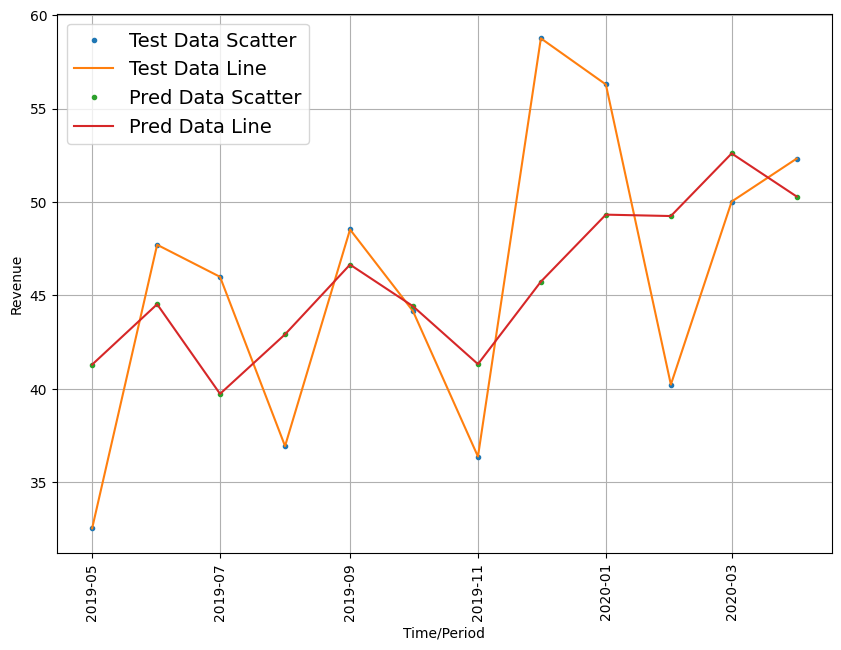

In [58]:
# Plot and visualize the results
offset = 0
plt.figure(figsize=(10, 7))

# Plot values in both formats so it's easier to see and understand
plot_ts(timesteps=X_test[-len(test_windows):],
        values=test_labels[:, 0],
        start=offset,
        format='.',
        label="Test Data Scatter")

plot_ts(timesteps=X_test[-len(test_windows):],
        values=test_labels[:, 0],
        start=offset,
        label="Test Data Line")

plot_ts(timesteps=X_test[-len(test_windows):],
        values=model_2_preds,
        start=offset,
        format='.',
        label="Pred Data Scatter")

plot_ts(timesteps=X_test[-len(test_windows):],
        values=model_2_preds,
        start=offset,
        label="Pred Data Line")

Surprisingly, we've already beat the results from our naive forecast. Regardless, let's keep trying to improve by implementing some of the other model architectures and window/horizon sizes.

## Dense Models with Different Window / Horizon Sizes

In [59]:
# Change global var values
HORIZON = 1
WINDOW = 12

In [60]:
# Create windowed data with appropriate variable sizes
full_windows_12, full_labels_12 = make_windows(revenue_mm,
                                               window=WINDOW,
                                               horizon=HORIZON)

len(full_windows_12), len(full_labels_12)

Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
       [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
       [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
      

(52, 52)

In [61]:
# Make train and test windows 
train_windows, train_labels, test_windows, test_labels = split_windows(windows=full_windows_12,
                                                                                labels=full_labels_12)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(41, 41, 11, 11)

In [62]:
window_12_dense = tf.keras.Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON, 'linear')
], name='windows_12_dense')

window_12_dense.compile(loss='mae',
                        optimizer=optimizers.Adam(0.007),
                        metrics=['mae', 'mse'])

tb_window_12 = create_tb_callback(logs,
                                  experiment_name=window_12_dense.name)
checkpoint_window_12 = create_model_checkpoint(window_12_dense.name)

history_window_12 = window_12_dense.fit(train_windows, train_labels, epochs=100,
                                        validation_data=(test_windows, test_labels),
                                        callbacks=[tb_window_12,
                                                   checkpoint_window_12,
                                                   lr_scheduler, reduce_lr])

Saving TensorBoard log files to: /content/model_experiments/windows_12_dense
Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 41.4465 - mae: 41.4465 - mse: 1846.0481

2/2 [==============================] - 2s 1s/step - loss: 41.8589 - mae: 41.8589 - mse: 1868.1495 - val_loss: 52.7003 - val_mae: 52.7003 - val_mse: 2848.5974 - lr: 0.0010
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 36.2267 - mae: 36.2267 - mse: 1428.2251

2/2 [==============================] - 1s 920ms/step - loss: 35.6623 - mae: 35.6623 - mse: 1381.1779 - val_loss: 44.7575 - val_mae: 44.7575 - val_mse: 2071.6729 - lr: 9.0000e-04
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 30.7071 - mae: 30.7071 - mse: 1057.2977

2/2 [==============================] - 1s 673ms/step - loss: 29.9956 - mae: 29.9956 - mse: 1001.8920 - val_loss: 37.5552 - val_mae: 37.5552 - val_mse: 1476.2653 - lr: 8.1000e-04
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 26.2269 - mae: 26.2269 - mse: 790.4376

2/2 [==============================] - 1s 692ms/step - loss: 24.8968 - mae: 24.8968 - mse: 717.6932 - val_loss: 31.0222 - val_mae: 31.0222 - val_mse: 1025.6688 - lr: 7.2900e-04
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 22.5452 - mae: 22.5452 - mse: 589.2360

2/2 [==============================] - 1s 623ms/step - loss: 20.3402 - mae: 20.3402 - mse: 506.5864 - val_loss: 25.0956 - val_mae: 25.0956 - val_mse: 691.5842 - lr: 6.5610e-04
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 16.6205 - mae: 16.6205 - mse: 346.6183

2/2 [==============================] - 1s 635ms/step - loss: 16.5830 - mae: 16.5830 - mse: 346.5514 - val_loss: 19.7926 - val_mae: 19.7926 - val_mse: 452.3114 - lr: 5.9049e-04
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 14.1705 - mae: 14.1705 - mse: 267.4229

2/2 [==============================] - 1s 610ms/step - loss: 13.3447 - mae: 13.3447 - mse: 239.8407 - val_loss: 15.0976 - val_mae: 15.0976 - val_mse: 287.1478 - lr: 5.3144e-04
Epoch 8/100
1/2 [==============>...............] - ETA: 0s - loss: 11.5346 - mae: 11.5346 - mse: 183.9118

2/2 [==============================] - 1s 611ms/step - loss: 10.7663 - mae: 10.7663 - mse: 168.3389 - val_loss: 11.3474 - val_mae: 11.3474 - val_mse: 176.7394 - lr: 4.7830e-04
Epoch 9/100
1/2 [==============>...............] - ETA: 0s - loss: 9.4102 - mae: 9.4102 - mse: 135.0062

2/2 [==============================] - 1s 623ms/step - loss: 8.8176 - mae: 8.8176 - mse: 125.3524 - val_loss: 9.3101 - val_mae: 9.3101 - val_mse: 110.6199 - lr: 4.3047e-04
Epoch 10/100
1/2 [==============>...............] - ETA: 0s - loss: 7.7801 - mae: 7.7801 - mse: 95.9263

2/2 [==============================] - 1s 630ms/step - loss: 7.8685 - mae: 7.8685 - mse: 99.6660 - val_loss: 8.0227 - val_mae: 8.0227 - val_mse: 76.8920 - lr: 3.8742e-04
Epoch 11/100
1/2 [==============>...............] - ETA: 0s - loss: 7.5660 - mae: 7.5660 - mse: 93.8551

2/2 [==============================] - 1s 641ms/step - loss: 7.4815 - mae: 7.4815 - mse: 88.5128 - val_loss: 7.0733 - val_mae: 7.0733 - val_mse: 61.7583 - lr: 3.4868e-04
Epoch 12/100
1/2 [==============>...............] - ETA: 0s - loss: 7.5509 - mae: 7.5509 - mse: 89.3449

2/2 [==============================] - 1s 672ms/step - loss: 7.5203 - mae: 7.5203 - mse: 85.5239 - val_loss: 6.3890 - val_mae: 6.3890 - val_mse: 55.9233 - lr: 3.1381e-04
Epoch 13/100
1/2 [==============>...............] - ETA: 0s - loss: 7.9428 - mae: 7.9428 - mse: 94.6305

2/2 [==============================] - 1s 1s/step - loss: 7.6331 - mae: 7.6331 - mse: 85.9813 - val_loss: 6.0281 - val_mae: 6.0281 - val_mse: 54.3660 - lr: 2.8243e-04
Epoch 14/100
1/2 [==============>...............] - ETA: 0s - loss: 8.0414 - mae: 8.0414 - mse: 95.5567

2/2 [==============================] - 1s 680ms/step - loss: 7.7064 - mae: 7.7064 - mse: 87.4591 - val_loss: 5.8948 - val_mae: 5.8948 - val_mse: 54.2899 - lr: 2.5419e-04
Epoch 15/100
1/2 [==============>...............] - ETA: 0s - loss: 7.6496 - mae: 7.6496 - mse: 80.2585

2/2 [==============================] - 1s 620ms/step - loss: 7.7775 - mae: 7.7775 - mse: 88.9874 - val_loss: 5.8344 - val_mae: 5.8344 - val_mse: 54.5132 - lr: 2.2877e-04
Epoch 16/100
1/2 [==============>...............] - ETA: 0s - loss: 7.8282 - mae: 7.8282 - mse: 86.8780

2/2 [==============================] - 1s 639ms/step - loss: 7.8047 - mae: 7.8047 - mse: 89.4730 - val_loss: 5.7975 - val_mae: 5.7975 - val_mse: 54.5605 - lr: 2.0589e-04
Epoch 17/100
1/2 [==============>...............] - ETA: 0s - loss: 7.9107 - mae: 7.9107 - mse: 93.6279

2/2 [==============================] - 1s 941ms/step - loss: 7.8133 - mae: 7.8133 - mse: 89.7156 - val_loss: 5.7768 - val_mae: 5.7768 - val_mse: 54.2363 - lr: 1.8530e-04
Epoch 18/100
1/2 [==============>...............] - ETA: 0s - loss: 8.4845 - mae: 8.4845 - mse: 101.6880

2/2 [==============================] - 1s 922ms/step - loss: 7.7946 - mae: 7.7946 - mse: 89.2714 - val_loss: 5.7692 - val_mae: 5.7692 - val_mse: 53.7052 - lr: 1.6677e-04
Epoch 19/100
1/2 [==============>...............] - ETA: 0s - loss: 8.0806 - mae: 8.0806 - mse: 97.5510

2/2 [==============================] - 1s 886ms/step - loss: 7.7589 - mae: 7.7589 - mse: 88.3951 - val_loss: 5.7648 - val_mae: 5.7648 - val_mse: 53.2392 - lr: 1.5009e-04
Epoch 20/100
2/2 [==============================] - 0s 85ms/step - loss: 7.7274 - mae: 7.7274 - mse: 87.6304 - val_loss: 5.7670 - val_mae: 5.7670 - val_mse: 52.7940 - lr: 1.3509e-04
Epoch 21/100
2/2 [==============================] - 0s 94ms/step - loss: 7.6941 - mae: 7.6941 - mse: 86.8963 - val_loss: 5.7720 - val_mae: 5.7720 - val_mse: 52.4042 - lr: 1.2158e-04
Epoch 22/100
2/2 [==============================] - 0s 89ms/step - loss: 7.6509 - mae: 7.6509 - mse: 85.9599 - val_loss: 5.8103 - val_mae: 5.8103 - val_mse: 52.0826 - lr: 1.0942e-04
Epoch 23/100
2/2 [==============================] - 0s 90ms/step - loss: 7.6199 - mae: 7.6199 - mse: 85.1316 - val_loss: 5.8616 - val_mae: 5.8616 - val_mse: 51.8558 - lr: 9.8477e-05
Epoch 24/100
2/2 [==============================] - 0s 88ms/step - loss: 7.5738 - mae: 7.5738 - mse: 8

In [63]:
window_12_dense.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 30ms/step - loss: 6.8912 - mae: 6.8912 - mse: 57.6927


[6.891229629516602, 6.891229629516602, 57.69270324707031]

In [64]:
window_12_dense = tf.keras.models.load_model("/content/model_experiments/windows_12_dense")
window_12_dense.evaluate(test_windows, test_labels)

windows_12_preds = make_preds(window_12_dense, test_windows)

1/1 [==============================] - 0s 55ms/step


In [65]:
windows_12_results = evaluate_preds(tf.squeeze(test_labels), windows_12_preds)
windows_12_results

{'mae': 5.764818,
 'mse': 53.23916,
 'rmse': 7.296517,
 'mape': 13.223714,
 'mase': 0.6586246}

In [66]:
naive_results, model_2_results

({'mae': 8.576542,
  'mse': 116.31625,
  'rmse': 10.785002,
  'mape': 18.524485,
  'mase': 0.9185617},
 {'mae': 5.407561,
  'mse': 41.68718,
  'rmse': 6.456561,
  'mape': 12.289422,
  'mase': 0.5791586})

It looks like expanding the window size hurts the data. This makes sense because by widening the window length we are actually cutting into the training data that the model has to learn from, even if slightly. In this case it has 5 less examples which, in a dataset with 63 total examples, is about 8% of the data.

In any case, now we'll try changing the horizon size and seeing whether the a model with a smaller or larger window size is better at predicting the new horizon. We'll change it from 1 to 3 (e.g., predicting revenue quarterly as opposed to monthly).

In [67]:
WINDOW = 7
HORIZON = 3

full_windows, full_labels = make_windows(revenue_mm, WINDOW, HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
       [14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
       [17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
       [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
       [19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
  

(55, 55)

In [68]:
# Dense model --> new horizon, original windows value
horizon_3_dense = tf.keras.Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON, 'linear')
], name='horizon_3_dense')

horizon_3_dense.compile(loss='mae',
                        optimizer=optimizers.Adam(0.007),
                        metrics=['mae', 'mse'])

tb_horizon_3 = create_tb_callback(logs,
                                  experiment_name=horizon_3_dense.name)
checkpoint_horizon_3 = create_model_checkpoint(horizon_3_dense.name)

history_horizon_3 = horizon_3_dense.fit(train_windows, train_labels, epochs=100,
                                        validation_data=(test_windows, test_labels),
                                        callbacks=[tb_horizon_3,
                                                   checkpoint_horizon_3,
                                                   lr_scheduler, reduce_lr])

Saving TensorBoard log files to: /content/model_experiments/horizon_3_dense
Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 29.1121 - mae: 29.1121 - mse: 1130.2991

2/2 [==============================] - 2s 851ms/step - loss: 28.5566 - mae: 28.5566 - mse: 1092.5544 - val_loss: 36.5873 - val_mae: 36.5873 - val_mse: 1751.0366 - lr: 0.0010
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 26.1376 - mae: 26.1376 - mse: 928.0206

2/2 [==============================] - 1s 672ms/step - loss: 25.0230 - mae: 25.0230 - mse: 863.9565 - val_loss: 32.2682 - val_mae: 32.2682 - val_mse: 1372.3911 - lr: 9.0000e-04
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 22.8035 - mae: 22.8035 - mse: 718.8569

2/2 [==============================] - 1s 680ms/step - loss: 21.9166 - mae: 21.9166 - mse: 676.9105 - val_loss: 28.3646 - val_mae: 28.3646 - val_mse: 1070.0199 - lr: 8.1000e-04
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 19.8036 - mae: 19.8036 - mse: 555.6529

2/2 [==============================] - 1s 616ms/step - loss: 19.2049 - mae: 19.2049 - mse: 529.8057 - val_loss: 24.8542 - val_mae: 24.8542 - val_mse: 829.8926 - lr: 7.2900e-04
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 16.9144 - mae: 16.9144 - mse: 417.1614

2/2 [==============================] - 1s 632ms/step - loss: 16.7945 - mae: 16.7945 - mse: 413.1895 - val_loss: 21.7202 - val_mae: 21.7202 - val_mse: 641.1624 - lr: 6.5610e-04
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 15.6396 - mae: 15.6396 - mse: 364.2499

2/2 [==============================] - 1s 684ms/step - loss: 14.7190 - mae: 14.7190 - mse: 326.9115 - val_loss: 18.9338 - val_mae: 18.9338 - val_mse: 494.4126 - lr: 5.9049e-04
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 12.2927 - mae: 12.2927 - mse: 228.8562

2/2 [==============================] - 1s 594ms/step - loss: 12.8753 - mae: 12.8753 - mse: 253.3535 - val_loss: 16.4340 - val_mae: 16.4340 - val_mse: 380.5078 - lr: 5.3144e-04
Epoch 8/100
1/2 [==============>...............] - ETA: 0s - loss: 10.5621 - mae: 10.5621 - mse: 178.5054

2/2 [==============================] - 1s 1s/step - loss: 11.4060 - mae: 11.4060 - mse: 202.3595 - val_loss: 14.1582 - val_mae: 14.1582 - val_mse: 292.0705 - lr: 4.7830e-04
Epoch 9/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6178 - mae: 9.6178 - mse: 144.1327

2/2 [==============================] - 1s 958ms/step - loss: 10.1574 - mae: 10.1574 - mse: 161.5257 - val_loss: 12.4674 - val_mae: 12.4674 - val_mse: 224.3804 - lr: 4.3047e-04
Epoch 10/100
1/2 [==============>...............] - ETA: 0s - loss: 9.0062 - mae: 9.0062 - mse: 130.0059

2/2 [==============================] - 1s 900ms/step - loss: 9.1727 - mae: 9.1727 - mse: 131.8230 - val_loss: 11.1755 - val_mae: 11.1755 - val_mse: 173.1338 - lr: 3.8742e-04
Epoch 11/100
1/2 [==============>...............] - ETA: 0s - loss: 8.0737 - mae: 8.0737 - mse: 101.5059

2/2 [==============================] - 1s 985ms/step - loss: 8.3473 - mae: 8.3473 - mse: 109.1486 - val_loss: 10.0275 - val_mae: 10.0275 - val_mse: 134.6191 - lr: 3.4868e-04
Epoch 12/100
1/2 [==============>...............] - ETA: 0s - loss: 7.5651 - mae: 7.5651 - mse: 92.3560

2/2 [==============================] - 1s 646ms/step - loss: 7.6882 - mae: 7.6882 - mse: 93.6589 - val_loss: 9.0103 - val_mae: 9.0103 - val_mse: 106.3446 - lr: 3.1381e-04
Epoch 13/100
1/2 [==============>...............] - ETA: 0s - loss: 7.3799 - mae: 7.3799 - mse: 84.7340

2/2 [==============================] - 1s 612ms/step - loss: 7.1656 - mae: 7.1656 - mse: 81.4043 - val_loss: 8.1218 - val_mae: 8.1218 - val_mse: 86.1247 - lr: 2.8243e-04
Epoch 14/100
1/2 [==============>...............] - ETA: 0s - loss: 6.8127 - mae: 6.8127 - mse: 72.8507

2/2 [==============================] - 1s 675ms/step - loss: 6.7711 - mae: 6.7711 - mse: 73.3839 - val_loss: 7.3561 - val_mae: 7.3561 - val_mse: 72.1119 - lr: 2.5419e-04
Epoch 15/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0847 - mae: 6.0847 - mse: 62.7345

2/2 [==============================] - 1s 660ms/step - loss: 6.5106 - mae: 6.5106 - mse: 68.4090 - val_loss: 6.7650 - val_mae: 6.7650 - val_mse: 62.9240 - lr: 2.2877e-04
Epoch 16/100
1/2 [==============>...............] - ETA: 0s - loss: 6.5709 - mae: 6.5709 - mse: 67.7224

2/2 [==============================] - 1s 657ms/step - loss: 6.3967 - mae: 6.3967 - mse: 65.3927 - val_loss: 6.4386 - val_mae: 6.4386 - val_mse: 57.0798 - lr: 2.0589e-04
Epoch 17/100
1/2 [==============>...............] - ETA: 0s - loss: 6.6899 - mae: 6.6899 - mse: 68.2148

2/2 [==============================] - 1s 668ms/step - loss: 6.3691 - mae: 6.3691 - mse: 63.3641 - val_loss: 6.1893 - val_mae: 6.1893 - val_mse: 53.5270 - lr: 1.8530e-04
Epoch 18/100
1/2 [==============>...............] - ETA: 0s - loss: 5.7854 - mae: 5.7854 - mse: 51.8350

2/2 [==============================] - 1s 667ms/step - loss: 6.3843 - mae: 6.3843 - mse: 62.5441 - val_loss: 6.0267 - val_mae: 6.0267 - val_mse: 51.2621 - lr: 1.6677e-04
Epoch 19/100
1/2 [==============>...............] - ETA: 0s - loss: 6.5393 - mae: 6.5393 - mse: 60.4616

2/2 [==============================] - 1s 645ms/step - loss: 6.4007 - mae: 6.4007 - mse: 61.9790 - val_loss: 5.9373 - val_mae: 5.9373 - val_mse: 49.8494 - lr: 1.5009e-04
Epoch 20/100
1/2 [==============>...............] - ETA: 0s - loss: 6.5579 - mae: 6.5579 - mse: 62.6763

2/2 [==============================] - 1s 600ms/step - loss: 6.4114 - mae: 6.4114 - mse: 61.7291 - val_loss: 5.8870 - val_mae: 5.8870 - val_mse: 49.0933 - lr: 1.3509e-04
Epoch 21/100
1/2 [==============>...............] - ETA: 0s - loss: 6.9261 - mae: 6.9261 - mse: 69.0296

2/2 [==============================] - 1s 589ms/step - loss: 6.4087 - mae: 6.4087 - mse: 61.5228 - val_loss: 5.8620 - val_mae: 5.8620 - val_mse: 48.7922 - lr: 1.2158e-04
Epoch 22/100
1/2 [==============>...............] - ETA: 0s - loss: 6.2356 - mae: 6.2356 - mse: 61.6317

2/2 [==============================] - 1s 597ms/step - loss: 6.4023 - mae: 6.4023 - mse: 61.3589 - val_loss: 5.8490 - val_mae: 5.8490 - val_mse: 48.7066 - lr: 1.0942e-04
Epoch 23/100
1/2 [==============>...............] - ETA: 0s - loss: 6.5847 - mae: 6.5847 - mse: 66.2497

2/2 [==============================] - 1s 637ms/step - loss: 6.3903 - mae: 6.3903 - mse: 61.2297 - val_loss: 5.8428 - val_mae: 5.8428 - val_mse: 48.7159 - lr: 9.8477e-05
Epoch 24/100
1/2 [==============>...............] - ETA: 0s - loss: 6.2142 - mae: 6.2142 - mse: 58.3333

2/2 [==============================] - 1s 615ms/step - loss: 6.3790 - mae: 6.3790 - mse: 61.1179 - val_loss: 5.8416 - val_mae: 5.8416 - val_mse: 48.7714 - lr: 8.8629e-05
Epoch 25/100
2/2 [==============================] - 0s 75ms/step - loss: 6.3634 - mae: 6.3634 - mse: 60.9926 - val_loss: 5.8510 - val_mae: 5.8510 - val_mse: 48.9232 - lr: 7.9766e-05
Epoch 26/100
2/2 [==============================] - 0s 48ms/step - loss: 6.3497 - mae: 6.3497 - mse: 60.8918 - val_loss: 5.8625 - val_mae: 5.8625 - val_mse: 49.0974 - lr: 7.1790e-05
Epoch 27/100
2/2 [==============================] - 0s 51ms/step - loss: 6.3352 - mae: 6.3352 - mse: 60.7395 - val_loss: 5.8716 - val_mae: 5.8716 - val_mse: 49.2441 - lr: 6.4611e-05
Epoch 28/100
2/2 [==============================] - 0s 69ms/step - loss: 6.3203 - mae: 6.3203 - mse: 60.6120 - val_loss: 5.8863 - val_mae: 5.8863 - val_mse: 49.4670 - lr: 5.8150e-05
Epoch 29/100
2/2 [==============================] - 0s 54ms/step - loss: 6.3056 - mae: 6.3056 - mse: 6

In [69]:
horizon_3_dense.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 32ms/step - loss: 6.0768 - mae: 6.0768 - mse: 52.3038


[6.0768208503723145, 6.0768208503723145, 52.30379867553711]

In [70]:
horizon_3_dense = tf.keras.models.load_model("/content/model_experiments/horizon_3_dense")
horizon_3_dense.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 171ms/step - loss: 5.8416 - mae: 5.8416 - mse: 48.7714


[5.841578960418701, 5.841578960418701, 48.771419525146484]

In [71]:
horizon_3_dense_preds = make_preds(horizon_3_dense, test_windows)
horizon_3_dense_preds[:5]

1/1 [==============================] - 0s 62ms/step


<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[42.2261  , 36.568222, 40.81835 ],
       [40.47286 , 41.537376, 37.70941 ],
       [38.68325 , 41.857872, 41.642136],
       [47.76462 , 42.473053, 46.278366],
       [45.193825, 47.755047, 42.16232 ]], dtype=float32)>

In [72]:
horizon_3_dense_results = evaluate_preds(test_labels, horizon_3_dense_preds)
horizon_3_dense_results

{'mae': array([ 7.83881  ,  6.0855927,  3.7940865,  3.0209134,  2.2087123,
         7.1954284, 14.029178 ,  6.8849335,  7.177794 ,  2.5504162,
         3.471508 ], dtype=float32),
 'mse': array([ 67.23105 ,  39.637012,  16.492844,  14.09148 ,   5.993899,
         56.659374, 204.34502 ,  49.778942,  53.306652,  12.747452,
         16.20184 ], dtype=float32),
 'rmse': array([ 8.199454 ,  6.295793 ,  4.061138 ,  3.7538621,  2.448244 ,
         7.527242 , 14.2949295,  7.0554194,  7.3011403,  3.5703573,
         4.025151 ], dtype=float32),
 'mape': array([16.430222 , 13.23181  , 10.272705 ,  6.2253165,  5.001566 ,
        19.78127  , 23.876818 , 12.231553 , 17.844006 ,  5.0985723,
         6.635057 ], dtype=float32),
 'mase': 0.66739446}

Let's update our `evaluate_preds()` function work for larger horizons, too. 

In [73]:
model_2_results['mae'].ndim

0

In [74]:
horizon_3_dense_results['mae'].ndim

1

In [75]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_abs_squared_error(y_true, y_pred)

  # Account for different sized metrics
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [76]:
horizon_3_results = evaluate_preds(test_labels, horizon_3_dense_preds)
horizon_3_results

{'mae': 5.841579,
 'mse': 48.77142,
 'rmse': 6.230248,
 'mape': 12.420808,
 'mase': 0.66739446}

In [77]:
model_2_results

{'mae': 5.407561,
 'mse': 41.68718,
 'rmse': 6.456561,
 'mape': 12.289422,
 'mase': 0.5791586}

In [78]:
# Run the same experiment but with the WINDOW size set to 12
WINDOW = 12
HORIZON = 3

full_windows_3_12, full_labels_3_12 = make_windows(revenue_mm, WINDOW, HORIZON)
len(full_windows), len(full_labels)

train_windows, train_labels, test_windows, test_labels = split_windows(windows=full_windows_3_12,
                                                                                labels=full_labels_3_12)
# Build and train model
horizon_3_window_12 = tf.keras.Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON, 'linear')
], name='horizon_3_window_12')

horizon_3_window_12.compile(loss='mae',
                        optimizer=optimizers.Adam(0.007),
                        metrics=['mae', 'mse'])

tb_horizon_3_window_12 = create_tb_callback(logs,
                                  experiment_name=horizon_3_window_12.name)
checkpoint_horizon_3_window_12 = create_model_checkpoint(horizon_3_window_12.name)

history_horizon_3_window_12 = horizon_3_window_12.fit(train_windows, train_labels, epochs=100,
                                        validation_data=(test_windows, test_labels),
                                        callbacks=[tb_horizon_3_window_12,
                                                   checkpoint_horizon_3_window_12,
                                                   lr_scheduler, reduce_lr])

horizon_3_window_12.evaluate(test_windows, test_labels)

# Load in best weights and get results
horizon_3_window_12 = tf.keras.models.load_model("/content/model_experiments/horizon_3_window_12")
horizon_3_window_12.evaluate(test_windows, test_labels)

h3w12_preds = make_preds(horizon_3_window_12, test_windows)

h3w12_results = evaluate_preds(test_labels, h3w12_preds)
h3w12_results

Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
       [14, 15, 

2/2 [==============================] - 2s 1s/step - loss: 24.7393 - mae: 24.7393 - mse: 768.4843 - val_loss: 30.1410 - val_mae: 30.1410 - val_mse: 1133.1571 - lr: 0.0010
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 21.3198 - mae: 21.3198 - mse: 603.9999

2/2 [==============================] - 1s 772ms/step - loss: 20.9082 - mae: 20.9082 - mse: 584.5331 - val_loss: 25.3422 - val_mae: 25.3422 - val_mse: 861.9779 - lr: 9.0000e-04
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 18.0541 - mae: 18.0541 - mse: 471.9056

2/2 [==============================] - 1s 680ms/step - loss: 17.7500 - mae: 17.7500 - mse: 445.8299 - val_loss: 21.3090 - val_mae: 21.3090 - val_mse: 650.6757 - lr: 8.1000e-04
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 15.6580 - mae: 15.6580 - mse: 344.9553

2/2 [==============================] - 1s 691ms/step - loss: 15.2658 - mae: 15.2658 - mse: 339.4578 - val_loss: 18.1251 - val_mae: 18.1251 - val_mse: 488.1935 - lr: 7.2900e-04
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 13.0959 - mae: 13.0959 - mse: 246.7712

2/2 [==============================] - 1s 685ms/step - loss: 13.2817 - mae: 13.2817 - mse: 256.2990 - val_loss: 15.5436 - val_mae: 15.5436 - val_mse: 364.8150 - lr: 6.5610e-04
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 12.0062 - mae: 12.0062 - mse: 210.2192

2/2 [==============================] - 1s 678ms/step - loss: 11.6541 - mae: 11.6541 - mse: 198.2253 - val_loss: 13.2327 - val_mae: 13.2327 - val_mse: 271.6855 - lr: 5.9049e-04
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 10.1058 - mae: 10.1058 - mse: 148.9988

2/2 [==============================] - 1s 644ms/step - loss: 10.2026 - mae: 10.2026 - mse: 152.4173 - val_loss: 11.5294 - val_mae: 11.5294 - val_mse: 202.4404 - lr: 5.3144e-04
Epoch 8/100
1/2 [==============>...............] - ETA: 0s - loss: 8.9851 - mae: 8.9851 - mse: 120.2791

2/2 [==============================] - 1s 626ms/step - loss: 8.9859 - mae: 8.9859 - mse: 120.4951 - val_loss: 10.2174 - val_mae: 10.2174 - val_mse: 152.4335 - lr: 4.7830e-04
Epoch 9/100
1/2 [==============>...............] - ETA: 0s - loss: 8.1059 - mae: 8.1059 - mse: 98.2227

2/2 [==============================] - 1s 614ms/step - loss: 8.0031 - mae: 8.0031 - mse: 97.7063 - val_loss: 9.0252 - val_mae: 9.0252 - val_mse: 117.6679 - lr: 4.3047e-04
Epoch 10/100
1/2 [==============>...............] - ETA: 0s - loss: 6.9856 - mae: 6.9856 - mse: 77.2144

2/2 [==============================] - 1s 580ms/step - loss: 7.2868 - mae: 7.2868 - mse: 82.9781 - val_loss: 7.9977 - val_mae: 7.9977 - val_mse: 94.5012 - lr: 3.8742e-04
Epoch 11/100
1/2 [==============>...............] - ETA: 0s - loss: 6.9445 - mae: 6.9445 - mse: 75.4173

2/2 [==============================] - 1s 617ms/step - loss: 6.9022 - mae: 6.9022 - mse: 73.2629 - val_loss: 7.2518 - val_mae: 7.2518 - val_mse: 79.8099 - lr: 3.4868e-04
Epoch 12/100
1/2 [==============>...............] - ETA: 0s - loss: 6.6954 - mae: 6.6954 - mse: 67.8227

2/2 [==============================] - 1s 650ms/step - loss: 6.6945 - mae: 6.6945 - mse: 67.9701 - val_loss: 6.8754 - val_mae: 6.8754 - val_mse: 70.9353 - lr: 3.1381e-04
Epoch 13/100
1/2 [==============>...............] - ETA: 0s - loss: 6.3465 - mae: 6.3465 - mse: 61.0754

2/2 [==============================] - 1s 649ms/step - loss: 6.5497 - mae: 6.5497 - mse: 64.7242 - val_loss: 6.6919 - val_mae: 6.6919 - val_mse: 65.7825 - lr: 2.8243e-04
Epoch 14/100
1/2 [==============>...............] - ETA: 0s - loss: 6.5431 - mae: 6.5431 - mse: 63.3921

2/2 [==============================] - 1s 693ms/step - loss: 6.4613 - mae: 6.4613 - mse: 63.0575 - val_loss: 6.5738 - val_mae: 6.5738 - val_mse: 62.8732 - lr: 2.5419e-04
Epoch 15/100
1/2 [==============>...............] - ETA: 0s - loss: 6.2505 - mae: 6.2505 - mse: 62.0442

2/2 [==============================] - 1s 1s/step - loss: 6.3782 - mae: 6.3782 - mse: 61.6706 - val_loss: 6.5086 - val_mae: 6.5086 - val_mse: 61.4585 - lr: 2.2877e-04
Epoch 16/100
1/2 [==============>...............] - ETA: 0s - loss: 6.3960 - mae: 6.3960 - mse: 62.4523

2/2 [==============================] - 1s 675ms/step - loss: 6.3479 - mae: 6.3479 - mse: 61.2324 - val_loss: 6.4541 - val_mae: 6.4541 - val_mse: 60.6470 - lr: 2.0589e-04
Epoch 17/100
1/2 [==============>...............] - ETA: 0s - loss: 6.4400 - mae: 6.4400 - mse: 65.4137

2/2 [==============================] - 1s 968ms/step - loss: 6.2963 - mae: 6.2963 - mse: 60.6383 - val_loss: 6.4064 - val_mae: 6.4064 - val_mse: 60.1520 - lr: 1.8530e-04
Epoch 18/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1348 - mae: 6.1348 - mse: 59.4168

2/2 [==============================] - 1s 959ms/step - loss: 6.2585 - mae: 6.2585 - mse: 60.2735 - val_loss: 6.3663 - val_mae: 6.3663 - val_mse: 59.9596 - lr: 1.6677e-04
Epoch 19/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9715 - mae: 5.9715 - mse: 58.8851

2/2 [==============================] - 1s 909ms/step - loss: 6.2224 - mae: 6.2224 - mse: 59.9601 - val_loss: 6.3412 - val_mae: 6.3412 - val_mse: 59.9825 - lr: 1.5009e-04
Epoch 20/100
2/2 [==============================] - 0s 96ms/step - loss: 6.1946 - mae: 6.1946 - mse: 59.8388 - val_loss: 6.3437 - val_mae: 6.3437 - val_mse: 60.1654 - lr: 1.3509e-04
Epoch 21/100
2/2 [==============================] - 0s 82ms/step - loss: 6.1638 - mae: 6.1638 - mse: 59.6479 - val_loss: 6.3452 - val_mae: 6.3452 - val_mse: 60.3889 - lr: 1.2158e-04
Epoch 22/100
2/2 [==============================] - 0s 88ms/step - loss: 6.1329 - mae: 6.1329 - mse: 59.4462 - val_loss: 6.3424 - val_mae: 6.3424 - val_mse: 60.4848 - lr: 1.0942e-04
Epoch 23/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0202 - mae: 6.0202 - mse: 57.0791

2/2 [==============================] - 1s 904ms/step - loss: 6.1129 - mae: 6.1129 - mse: 59.2571 - val_loss: 6.3391 - val_mae: 6.3391 - val_mse: 60.5455 - lr: 9.8477e-05
Epoch 24/100
2/2 [==============================] - 0s 78ms/step - loss: 6.0948 - mae: 6.0948 - mse: 59.0495 - val_loss: 6.3397 - val_mae: 6.3397 - val_mse: 60.7210 - lr: 8.8629e-05
Epoch 25/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0541 - mae: 6.0541 - mse: 58.3475

2/2 [==============================] - 1s 639ms/step - loss: 6.0814 - mae: 6.0814 - mse: 58.9595 - val_loss: 6.3391 - val_mae: 6.3391 - val_mse: 60.8719 - lr: 7.9766e-05
Epoch 26/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0987 - mae: 6.0987 - mse: 59.6408

2/2 [==============================] - 1s 669ms/step - loss: 6.0699 - mae: 6.0699 - mse: 58.8512 - val_loss: 6.3348 - val_mae: 6.3348 - val_mse: 60.8896 - lr: 7.1790e-05
Epoch 27/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9272 - mae: 5.9272 - mse: 55.4094

2/2 [==============================] - 1s 642ms/step - loss: 6.0591 - mae: 6.0591 - mse: 58.7166 - val_loss: 6.3291 - val_mae: 6.3291 - val_mse: 60.8425 - lr: 6.4611e-05
Epoch 28/100
1/2 [==============>...............] - ETA: 0s - loss: 5.6127 - mae: 5.6127 - mse: 50.4708

2/2 [==============================] - 1s 605ms/step - loss: 6.0501 - mae: 6.0501 - mse: 58.5627 - val_loss: 6.3210 - val_mae: 6.3210 - val_mse: 60.6947 - lr: 5.8150e-05
Epoch 29/100
1/2 [==============>...............] - ETA: 0s - loss: 6.3735 - mae: 6.3735 - mse: 65.2697

2/2 [==============================] - 1s 623ms/step - loss: 6.0425 - mae: 6.0425 - mse: 58.4371 - val_loss: 6.3116 - val_mae: 6.3116 - val_mse: 60.4989 - lr: 5.2335e-05
Epoch 30/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9481 - mae: 5.9481 - mse: 56.8911

2/2 [==============================] - 1s 644ms/step - loss: 6.0366 - mae: 6.0366 - mse: 58.3189 - val_loss: 6.3028 - val_mae: 6.3028 - val_mse: 60.3083 - lr: 4.7101e-05
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8705 - mae: 5.8705 - mse: 55.9053

2/2 [==============================] - 1s 650ms/step - loss: 6.0289 - mae: 6.0289 - mse: 58.1512 - val_loss: 6.2925 - val_mae: 6.2925 - val_mse: 60.0430 - lr: 4.2391e-05
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1255 - mae: 6.1255 - mse: 61.4002

2/2 [==============================] - 1s 675ms/step - loss: 6.0244 - mae: 6.0244 - mse: 58.0397 - val_loss: 6.2828 - val_mae: 6.2828 - val_mse: 59.8043 - lr: 3.8152e-05
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 5.7857 - mae: 5.7857 - mse: 52.3203

2/2 [==============================] - 1s 644ms/step - loss: 6.0200 - mae: 6.0200 - mse: 57.9007 - val_loss: 6.2757 - val_mae: 6.2757 - val_mse: 59.6483 - lr: 3.4337e-05
Epoch 34/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1281 - mae: 6.1281 - mse: 60.2586

2/2 [==============================] - 1s 617ms/step - loss: 6.0163 - mae: 6.0163 - mse: 57.8128 - val_loss: 6.2694 - val_mae: 6.2694 - val_mse: 59.5046 - lr: 3.0903e-05
Epoch 35/100
1/2 [==============>...............] - ETA: 0s - loss: 6.2661 - mae: 6.2661 - mse: 63.6925

2/2 [==============================] - 1s 649ms/step - loss: 6.0137 - mae: 6.0137 - mse: 57.7359 - val_loss: 6.2644 - val_mae: 6.2644 - val_mse: 59.3952 - lr: 2.7813e-05
Epoch 36/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0943 - mae: 6.0943 - mse: 60.5808

2/2 [==============================] - 1s 652ms/step - loss: 6.0102 - mae: 6.0102 - mse: 57.6559 - val_loss: 6.2613 - val_mae: 6.2613 - val_mse: 59.3460 - lr: 2.5032e-05
Epoch 37/100
1/2 [==============>...............] - ETA: 0s - loss: 5.5535 - mae: 5.5535 - mse: 49.1262

2/2 [==============================] - 1s 607ms/step - loss: 6.0069 - mae: 6.0069 - mse: 57.5940 - val_loss: 6.2575 - val_mae: 6.2575 - val_mse: 59.2696 - lr: 2.2528e-05
Epoch 38/100
1/2 [==============>...............] - ETA: 0s - loss: 5.7904 - mae: 5.7904 - mse: 52.8432

2/2 [==============================] - 1s 1s/step - loss: 6.0043 - mae: 6.0043 - mse: 57.5448 - val_loss: 6.2541 - val_mae: 6.2541 - val_mse: 59.1971 - lr: 2.0276e-05
Epoch 39/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1603 - mae: 6.1603 - mse: 57.7134

2/2 [==============================] - 1s 870ms/step - loss: 6.0022 - mae: 6.0022 - mse: 57.5000 - val_loss: 6.2512 - val_mae: 6.2512 - val_mse: 59.1426 - lr: 1.8248e-05
Epoch 40/100
1/2 [==============>...............] - ETA: 0s - loss: 5.7419 - mae: 5.7419 - mse: 55.3057

2/2 [==============================] - 1s 887ms/step - loss: 6.0001 - mae: 6.0001 - mse: 57.4614 - val_loss: 6.2493 - val_mae: 6.2493 - val_mse: 59.1117 - lr: 1.6423e-05
Epoch 41/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8312 - mae: 5.8312 - mse: 56.8748

2/2 [==============================] - 1s 946ms/step - loss: 5.9980 - mae: 5.9980 - mse: 57.4243 - val_loss: 6.2473 - val_mae: 6.2473 - val_mse: 59.0790 - lr: 1.4781e-05
Epoch 42/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8645 - mae: 5.8645 - mse: 57.0980

2/2 [==============================] - 1s 959ms/step - loss: 5.9962 - mae: 5.9962 - mse: 57.3910 - val_loss: 6.2459 - val_mae: 6.2459 - val_mse: 59.0633 - lr: 1.3303e-05
Epoch 43/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0721 - mae: 6.0721 - mse: 58.9336

2/2 [==============================] - 1s 817ms/step - loss: 5.9947 - mae: 5.9947 - mse: 57.3670 - val_loss: 6.2444 - val_mae: 6.2444 - val_mse: 59.0386 - lr: 1.1973e-05
Epoch 44/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8316 - mae: 5.8316 - mse: 54.8765

2/2 [==============================] - 1s 630ms/step - loss: 5.9930 - mae: 5.9930 - mse: 57.3370 - val_loss: 6.2423 - val_mae: 6.2423 - val_mse: 58.9917 - lr: 1.0775e-05
Epoch 45/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0199 - mae: 6.0199 - mse: 59.5876

2/2 [==============================] - 1s 667ms/step - loss: 5.9918 - mae: 5.9918 - mse: 57.3116 - val_loss: 6.2402 - val_mae: 6.2402 - val_mse: 58.9427 - lr: 9.6977e-06
Epoch 46/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9148 - mae: 5.9148 - mse: 55.3502

2/2 [==============================] - 1s 625ms/step - loss: 5.9906 - mae: 5.9906 - mse: 57.2865 - val_loss: 6.2383 - val_mae: 6.2383 - val_mse: 58.8956 - lr: 8.7280e-06
Epoch 47/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0301 - mae: 6.0301 - mse: 58.9542

2/2 [==============================] - 1s 627ms/step - loss: 5.9896 - mae: 5.9896 - mse: 57.2660 - val_loss: 6.2363 - val_mae: 6.2363 - val_mse: 58.8459 - lr: 7.8552e-06
Epoch 48/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1391 - mae: 6.1391 - mse: 60.0585

2/2 [==============================] - 1s 671ms/step - loss: 5.9888 - mae: 5.9888 - mse: 57.2437 - val_loss: 6.2347 - val_mae: 6.2347 - val_mse: 58.8068 - lr: 7.0697e-06
Epoch 49/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9367 - mae: 5.9367 - mse: 56.7977

2/2 [==============================] - 1s 642ms/step - loss: 5.9879 - mae: 5.9879 - mse: 57.2235 - val_loss: 6.2335 - val_mae: 6.2335 - val_mse: 58.7822 - lr: 6.3627e-06
Epoch 50/100
1/2 [==============>...............] - ETA: 0s - loss: 5.5641 - mae: 5.5641 - mse: 50.0159

2/2 [==============================] - 1s 684ms/step - loss: 5.9871 - mae: 5.9871 - mse: 57.2089 - val_loss: 6.2325 - val_mae: 6.2325 - val_mse: 58.7591 - lr: 5.7264e-06
Epoch 51/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0439 - mae: 6.0439 - mse: 56.5835

2/2 [==============================] - 1s 623ms/step - loss: 5.9864 - mae: 5.9864 - mse: 57.1947 - val_loss: 6.2313 - val_mae: 6.2313 - val_mse: 58.7313 - lr: 5.1538e-06
Epoch 52/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1293 - mae: 6.1293 - mse: 61.6534

2/2 [==============================] - 1s 609ms/step - loss: 5.9858 - mae: 5.9858 - mse: 57.1822 - val_loss: 6.2302 - val_mae: 6.2302 - val_mse: 58.7081 - lr: 4.6384e-06
Epoch 53/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9703 - mae: 5.9703 - mse: 56.2706

2/2 [==============================] - 1s 699ms/step - loss: 5.9852 - mae: 5.9852 - mse: 57.1694 - val_loss: 6.2293 - val_mae: 6.2293 - val_mse: 58.6880 - lr: 4.1746e-06
Epoch 54/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1175 - mae: 6.1175 - mse: 58.9903

2/2 [==============================] - 1s 677ms/step - loss: 5.9847 - mae: 5.9847 - mse: 57.1585 - val_loss: 6.2287 - val_mae: 6.2287 - val_mse: 58.6756 - lr: 3.7571e-06
Epoch 55/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1455 - mae: 6.1455 - mse: 60.8858

2/2 [==============================] - 1s 626ms/step - loss: 5.9843 - mae: 5.9843 - mse: 57.1494 - val_loss: 6.2281 - val_mae: 6.2281 - val_mse: 58.6679 - lr: 3.3814e-06
Epoch 56/100
1/2 [==============>...............] - ETA: 0s - loss: 5.7157 - mae: 5.7157 - mse: 49.4187

2/2 [==============================] - 1s 1s/step - loss: 5.9838 - mae: 5.9838 - mse: 57.1403 - val_loss: 6.2275 - val_mae: 6.2275 - val_mse: 58.6571 - lr: 3.0433e-06
Epoch 57/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0504 - mae: 6.0504 - mse: 59.7258

2/2 [==============================] - 1s 621ms/step - loss: 5.9834 - mae: 5.9834 - mse: 57.1331 - val_loss: 6.2271 - val_mae: 6.2271 - val_mse: 58.6503 - lr: 2.7389e-06
Epoch 58/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1678 - mae: 6.1678 - mse: 56.8781

2/2 [==============================] - 1s 887ms/step - loss: 5.9831 - mae: 5.9831 - mse: 57.1283 - val_loss: 6.2267 - val_mae: 6.2267 - val_mse: 58.6431 - lr: 2.4650e-06
Epoch 59/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1537 - mae: 6.1537 - mse: 59.7989

2/2 [==============================] - 1s 982ms/step - loss: 5.9828 - mae: 5.9828 - mse: 57.1225 - val_loss: 6.2262 - val_mae: 6.2262 - val_mse: 58.6335 - lr: 2.2185e-06
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1685 - mae: 6.1685 - mse: 60.3335

2/2 [==============================] - 1s 953ms/step - loss: 5.9825 - mae: 5.9825 - mse: 57.1165 - val_loss: 6.2259 - val_mae: 6.2259 - val_mse: 58.6265 - lr: 1.9967e-06
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9907 - mae: 5.9907 - mse: 57.3580

2/2 [==============================] - 1s 942ms/step - loss: 5.9823 - mae: 5.9823 - mse: 57.1120 - val_loss: 6.2256 - val_mae: 6.2256 - val_mse: 58.6235 - lr: 1.7970e-06
Epoch 62/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1171 - mae: 6.1171 - mse: 60.6073

2/2 [==============================] - 1s 790ms/step - loss: 5.9820 - mae: 5.9820 - mse: 57.1082 - val_loss: 6.2255 - val_mae: 6.2255 - val_mse: 58.6237 - lr: 1.6173e-06
Epoch 63/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9318 - mae: 5.9318 - mse: 55.8891

2/2 [==============================] - 1s 660ms/step - loss: 5.9818 - mae: 5.9818 - mse: 57.1054 - val_loss: 6.2254 - val_mae: 6.2254 - val_mse: 58.6242 - lr: 1.4556e-06
Epoch 64/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9083 - mae: 5.9083 - mse: 57.6892

2/2 [==============================] - 1s 682ms/step - loss: 5.9816 - mae: 5.9816 - mse: 57.1041 - val_loss: 6.2253 - val_mae: 6.2253 - val_mse: 58.6247 - lr: 1.3100e-06
Epoch 65/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8674 - mae: 5.8674 - mse: 56.9330

2/2 [==============================] - 1s 676ms/step - loss: 5.9814 - mae: 5.9814 - mse: 57.1024 - val_loss: 6.2252 - val_mae: 6.2252 - val_mse: 58.6240 - lr: 1.1790e-06
Epoch 66/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1458 - mae: 6.1458 - mse: 60.8738

2/2 [==============================] - 1s 674ms/step - loss: 5.9812 - mae: 5.9812 - mse: 57.1013 - val_loss: 6.2251 - val_mae: 6.2251 - val_mse: 58.6241 - lr: 1.0611e-06
Epoch 67/100
1/2 [==============>...............] - ETA: 0s - loss: 5.7547 - mae: 5.7547 - mse: 48.5715

2/2 [==============================] - 1s 628ms/step - loss: 5.9811 - mae: 5.9811 - mse: 57.1004 - val_loss: 6.2250 - val_mae: 6.2250 - val_mse: 58.6246 - lr: 9.5500e-07
Epoch 68/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1483 - mae: 6.1483 - mse: 62.4685

2/2 [==============================] - 1s 623ms/step - loss: 5.9809 - mae: 5.9809 - mse: 57.0992 - val_loss: 6.2250 - val_mae: 6.2250 - val_mse: 58.6250 - lr: 8.5950e-07
Epoch 69/100
1/2 [==============>...............] - ETA: 0s - loss: 5.5475 - mae: 5.5475 - mse: 47.1527

2/2 [==============================] - 1s 699ms/step - loss: 5.9808 - mae: 5.9808 - mse: 57.0982 - val_loss: 6.2249 - val_mae: 6.2249 - val_mse: 58.6256 - lr: 7.7355e-07
Epoch 70/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0013 - mae: 6.0013 - mse: 58.8666

2/2 [==============================] - 1s 618ms/step - loss: 5.9807 - mae: 5.9807 - mse: 57.0967 - val_loss: 6.2249 - val_mae: 6.2249 - val_mse: 58.6249 - lr: 6.9620e-07
Epoch 71/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9808 - mae: 5.9808 - mse: 58.9425

2/2 [==============================] - 1s 644ms/step - loss: 5.9806 - mae: 5.9806 - mse: 57.0952 - val_loss: 6.2248 - val_mae: 6.2248 - val_mse: 58.6236 - lr: 6.2658e-07
Epoch 72/100
1/2 [==============>...............] - ETA: 0s - loss: 5.6704 - mae: 5.6704 - mse: 47.8776

2/2 [==============================] - 1s 701ms/step - loss: 5.9805 - mae: 5.9805 - mse: 57.0938 - val_loss: 6.2247 - val_mae: 6.2247 - val_mse: 58.6219 - lr: 5.6392e-07
Epoch 73/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1714 - mae: 6.1714 - mse: 59.9025

2/2 [==============================] - 1s 1s/step - loss: 5.9805 - mae: 5.9805 - mse: 57.0923 - val_loss: 6.2246 - val_mae: 6.2246 - val_mse: 58.6198 - lr: 5.0753e-07
Epoch 74/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1869 - mae: 6.1869 - mse: 60.1779

2/2 [==============================] - 1s 684ms/step - loss: 5.9804 - mae: 5.9804 - mse: 57.0908 - val_loss: 6.2246 - val_mae: 6.2246 - val_mse: 58.6184 - lr: 4.5678e-07
Epoch 75/100
1/2 [==============>...............] - ETA: 0s - loss: 5.7886 - mae: 5.7886 - mse: 55.7092

2/2 [==============================] - 1s 613ms/step - loss: 5.9803 - mae: 5.9803 - mse: 57.0897 - val_loss: 6.2245 - val_mae: 6.2245 - val_mse: 58.6170 - lr: 4.1110e-07
Epoch 76/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0221 - mae: 6.0221 - mse: 57.9868

2/2 [==============================] - 1s 831ms/step - loss: 5.9803 - mae: 5.9803 - mse: 57.0885 - val_loss: 6.2244 - val_mae: 6.2244 - val_mse: 58.6156 - lr: 3.6999e-07
Epoch 77/100
1/2 [==============>...............] - ETA: 0s - loss: 6.2977 - mae: 6.2977 - mse: 60.8496

2/2 [==============================] - 1s 1s/step - loss: 5.9802 - mae: 5.9802 - mse: 57.0875 - val_loss: 6.2244 - val_mae: 6.2244 - val_mse: 58.6147 - lr: 3.3299e-07
Epoch 78/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0451 - mae: 6.0451 - mse: 55.5484

2/2 [==============================] - 1s 943ms/step - loss: 5.9802 - mae: 5.9802 - mse: 57.0865 - val_loss: 6.2244 - val_mae: 6.2244 - val_mse: 58.6143 - lr: 2.9969e-07
Epoch 79/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9501 - mae: 5.9501 - mse: 55.6426

2/2 [==============================] - 1s 895ms/step - loss: 5.9801 - mae: 5.9801 - mse: 57.0858 - val_loss: 6.2244 - val_mae: 6.2244 - val_mse: 58.6145 - lr: 2.6972e-07
Epoch 80/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9566 - mae: 5.9566 - mse: 55.6337

2/2 [==============================] - 1s 796ms/step - loss: 5.9801 - mae: 5.9801 - mse: 57.0853 - val_loss: 6.2243 - val_mae: 6.2243 - val_mse: 58.6149 - lr: 2.4275e-07
Epoch 81/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1427 - mae: 6.1427 - mse: 59.3227

2/2 [==============================] - 1s 611ms/step - loss: 5.9801 - mae: 5.9801 - mse: 57.0849 - val_loss: 6.2243 - val_mae: 6.2243 - val_mse: 58.6148 - lr: 2.1847e-07
Epoch 82/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0328 - mae: 6.0328 - mse: 60.0220

2/2 [==============================] - 1s 623ms/step - loss: 5.9800 - mae: 5.9800 - mse: 57.0845 - val_loss: 6.2243 - val_mae: 6.2243 - val_mse: 58.6145 - lr: 1.9663e-07
Epoch 83/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8157 - mae: 5.8157 - mse: 55.9293

2/2 [==============================] - 1s 593ms/step - loss: 5.9800 - mae: 5.9800 - mse: 57.0840 - val_loss: 6.2243 - val_mae: 6.2243 - val_mse: 58.6145 - lr: 1.7696e-07
Epoch 84/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9099 - mae: 5.9099 - mse: 54.7048

2/2 [==============================] - 1s 632ms/step - loss: 5.9800 - mae: 5.9800 - mse: 57.0838 - val_loss: 6.2243 - val_mae: 6.2243 - val_mse: 58.6144 - lr: 1.5927e-07
Epoch 85/100
1/2 [==============>...............] - ETA: 0s - loss: 5.5661 - mae: 5.5661 - mse: 50.0726

2/2 [==============================] - 1s 665ms/step - loss: 5.9800 - mae: 5.9800 - mse: 57.0835 - val_loss: 6.2243 - val_mae: 6.2243 - val_mse: 58.6142 - lr: 1.4334e-07
Epoch 86/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8619 - mae: 5.8619 - mse: 56.4439

2/2 [==============================] - 1s 619ms/step - loss: 5.9799 - mae: 5.9799 - mse: 57.0833 - val_loss: 6.2243 - val_mae: 6.2243 - val_mse: 58.6141 - lr: 1.2901e-07
Epoch 87/100
1/2 [==============>...............] - ETA: 0s - loss: 6.4552 - mae: 6.4552 - mse: 64.1245

2/2 [==============================] - 1s 630ms/step - loss: 5.9799 - mae: 5.9799 - mse: 57.0830 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6140 - lr: 1.1611e-07
Epoch 88/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1511 - mae: 6.1511 - mse: 61.3438

2/2 [==============================] - 1s 622ms/step - loss: 5.9799 - mae: 5.9799 - mse: 57.0828 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6142 - lr: 1.0450e-07
Epoch 89/100
1/2 [==============>...............] - ETA: 0s - loss: 5.7800 - mae: 5.7800 - mse: 51.7654

2/2 [==============================] - 1s 613ms/step - loss: 5.9799 - mae: 5.9799 - mse: 57.0827 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6143 - lr: 9.4046e-08
Epoch 90/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8221 - mae: 5.8221 - mse: 55.1826

2/2 [==============================] - 1s 1s/step - loss: 5.9799 - mae: 5.9799 - mse: 57.0826 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6144 - lr: 8.4641e-08
Epoch 91/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8642 - mae: 5.8642 - mse: 54.9711

2/2 [==============================] - 1s 641ms/step - loss: 5.9799 - mae: 5.9799 - mse: 57.0824 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6145 - lr: 7.6177e-08
Epoch 92/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0111 - mae: 6.0111 - mse: 57.5633

2/2 [==============================] - 1s 676ms/step - loss: 5.9799 - mae: 5.9799 - mse: 57.0823 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6145 - lr: 6.8560e-08
Epoch 93/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9708 - mae: 5.9708 - mse: 57.6085

2/2 [==============================] - 1s 656ms/step - loss: 5.9799 - mae: 5.9799 - mse: 57.0822 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6144 - lr: 6.1704e-08
Epoch 94/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8950 - mae: 5.8950 - mse: 57.8988

2/2 [==============================] - 1s 632ms/step - loss: 5.9798 - mae: 5.9798 - mse: 57.0821 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6144 - lr: 5.5533e-08
Epoch 95/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9669 - mae: 5.9669 - mse: 57.6962

2/2 [==============================] - 1s 823ms/step - loss: 5.9798 - mae: 5.9798 - mse: 57.0820 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6143 - lr: 4.9980e-08
Epoch 96/100
1/2 [==============>...............] - ETA: 0s - loss: 5.7797 - mae: 5.7797 - mse: 53.3381

2/2 [==============================] - 1s 954ms/step - loss: 5.9798 - mae: 5.9798 - mse: 57.0819 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6143 - lr: 4.4982e-08
Epoch 97/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1119 - mae: 6.1119 - mse: 59.5546

2/2 [==============================] - 1s 1s/step - loss: 5.9798 - mae: 5.9798 - mse: 57.0818 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6141 - lr: 4.0484e-08
Epoch 98/100
1/2 [==============>...............] - ETA: 0s - loss: 6.1338 - mae: 6.1338 - mse: 61.0961

2/2 [==============================] - 1s 947ms/step - loss: 5.9798 - mae: 5.9798 - mse: 57.0817 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6140 - lr: 3.6435e-08
Epoch 99/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9377 - mae: 5.9377 - mse: 57.3834

2/2 [==============================] - 1s 811ms/step - loss: 5.9798 - mae: 5.9798 - mse: 57.0816 - val_loss: 6.2242 - val_mae: 6.2242 - val_mse: 58.6138 - lr: 3.2792e-08
Epoch 100/100
1/2 [==============>...............] - ETA: 0s - loss: 6.0573 - mae: 6.0573 - mse: 56.1958

1/1 [==============================] - 0s 141ms/step - loss: 6.2242 - mae: 6.2242 - mse: 58.6137


1/1 [==============================] - 0s 63ms/step


{'mae': 6.2241817,
 'mse': 58.613686,
 'rmse': 7.135968,
 'mape': 13.673319,
 'mase': 0.64227915}

In [79]:
horizon_3_results, windows_12_results

({'mae': 5.841579,
  'mse': 48.77142,
  'rmse': 6.230248,
  'mape': 12.420808,
  'mase': 0.66739446},
 {'mae': 5.764818,
  'mse': 53.23916,
  'rmse': 7.296517,
  'mape': 13.223714,
  'mase': 0.6586246})

These results are not very surprising: both the models that had a larger horizon performed worse than their window-counterparts that had smaller horizons. 

Though changing the window size also impacts the training noticeably, the gap created by changing window size is less significant than that created by changes in horizon size.

That's enough Dense architectures for now. Let's try using some Conv1D and LSTM architectures. We'll first try a standalone Conv1D architecture, followed by standalone LSTM (and bidirectional) architectures. Finally, we will merge them together and see which of our experiments has been the most successful.


### Plotting our Models' Performances So Far...

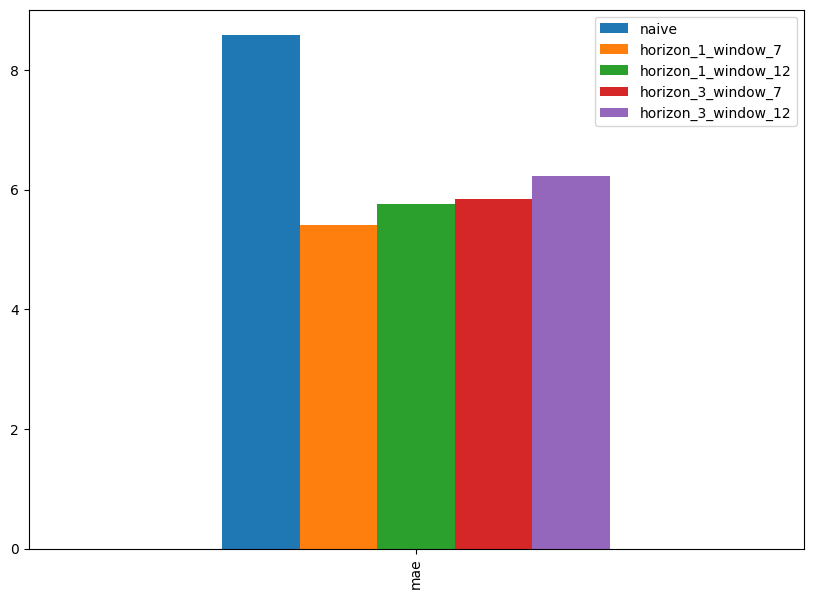

In [80]:
pd.DataFrame({"naive":naive_results['mae'],
              "horizon_1_window_7": model_2_results['mae'],
              "horizon_1_window_12": windows_12_results['mae'],
              "horizon_3_window_7": horizon_3_results['mae'],
              "horizon_3_window_12": h3w12_results['mae']},
             index=['mae']).plot(kind='bar', figsize=(10, 7));

As noted, the best results so far are clearly coming from the model with the smallest window AND horizon. Let's go back to the values `WINDOW = 7` and `HORIZON = 1` and move on to our Conv1D and LSTM experiments to wrap up.

In [81]:
# Reset global vars
HORIZON = 1
WINDOW = 7

full_windows, full_labels = make_windows(revenue_mm, WINDOW, HORIZON)
train_windows, train_labels, test_windows, test_labels = split_windows(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [11, 12, 13, 14, 15, 16, 17, 18],
       [12, 13, 14, 15, 16, 17, 18, 19],
       [13, 14, 15, 16, 17, 18, 19, 20],
       [14, 15, 16, 17, 18, 19, 20, 21],
       [15, 16, 17, 18, 19, 20, 21, 22],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [18, 19, 20, 21, 22, 23, 24, 25],
       [19, 20, 21, 22, 23, 24, 25, 26],
       [20, 21, 22, 23, 24, 25, 26, 27],
       [21, 22, 23, 24, 25, 26, 27, 28],
       [22, 23, 24, 25, 26, 27, 28, 29],
       [23, 24, 25, 26, 27, 28, 29, 30]

(45, 45, 12, 12)

To use a Conv1D layer, we need an input shape of `(batch_size, timesteps, input_dim)`...

In [82]:
train_windows[0].shape

(7,)

In [83]:
# Reshape data to make sure it works before passing off to Conv1D layer
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([16.01007212, 15.80758745, 22.04714602, 18.81458329, 14.02147961,
       16.78392852, 19.16189219])>

In [84]:
# Layer for expanding dims in the Conv1D model
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [85]:
# Test expand_dims_layer
print(f"Original shape: {x.shape}") # WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[16.010073]
 [15.807588]
 [22.047146]
 [18.814583]
 [14.02148 ]
 [16.783928]
 [19.161892]]


In [86]:
print(x.numpy())

[16.01007212 15.80758745 22.04714602 18.81458329 14.02147961 16.78392852
 19.16189219]


In [87]:
# Build the Conv1D architecture
conv_model = tf.keras.Sequential([
    expand_dims_layer,
    layers.Conv1D(filters=128,
                  kernel_size=5,
                  padding='causal',
                  activation='relu'),
    layers.Dense(HORIZON)
], name='conv_model')

conv_model.compile(loss=losses.mae,
                   optimizer=optimizers.Adam(0.007),
                   metrics=['mae', 'mse'])

tb_conv = create_tb_callback(logs, experiment_name=conv_model.name)
conv_checkpoint = create_model_checkpoint(conv_model.name)

# Without LR callbacks for now - monitor to see if we need them
conv_history = conv_model.fit(train_windows, train_labels, epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[tb_conv, conv_checkpoint])

Saving TensorBoard log files to: /content/model_experiments/conv_model
Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 41.0770 - mae: 41.0770 - mse: 1833.2279

2/2 [==============================] - 2s 1s/step - loss: 37.5943 - mae: 37.5943 - mse: 1562.9073 - val_loss: 27.6308 - val_mae: 27.6308 - val_mse: 836.6719
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 18.2533 - mae: 18.2533 - mse: 393.0586

2/2 [==============================] - 1s 1s/step - loss: 16.1108 - mae: 16.1108 - mse: 334.5875 - val_loss: 7.0479 - val_mae: 7.0479 - val_mse: 77.6251
Epoch 3/100
2/2 [==============================] - 0s 67ms/step - loss: 8.1209 - mae: 8.1209 - mse: 97.0719 - val_loss: 17.5086 - val_mae: 17.5086 - val_mse: 372.6404
Epoch 4/100
2/2 [==============================] - 0s 71ms/step - loss: 12.7149 - mae: 12.7149 - mse: 242.9201 - val_loss: 17.2101 - val_mae: 17.2101 - val_mse: 361.9602
Epoch 5/100
2/2 [==============================] - 0s 77ms/step - loss: 12.2070 - mae: 12.2070 - mse: 224.0044 - val_loss: 10.8459 - val_mae: 10.8459 - val_mse: 170.3826
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 9.6319 - mae: 9.6319 - mse: 134.3791

2/2 [==============================] - 2s 2s/step - loss: 9.2743 - mae: 9.2743 - mse: 126.6359 - val_loss: 6.7599 - val_mae: 6.7599 - val_mse: 64.1311
Epoch 7/100
2/2 [==============================] - 0s 81ms/step - loss: 7.3686 - mae: 7.3686 - mse: 83.3997 - val_loss: 9.1918 - val_mae: 9.1918 - val_mse: 115.3136
Epoch 8/100
2/2 [==============================] - 0s 87ms/step - loss: 7.7351 - mae: 7.7351 - mse: 95.0131 - val_loss: 10.2426 - val_mae: 10.2426 - val_mse: 159.0726
Epoch 9/100
2/2 [==============================] - 0s 61ms/step - loss: 8.4530 - mae: 8.4530 - mse: 111.8186 - val_loss: 9.7851 - val_mae: 9.7851 - val_mse: 145.7017
Epoch 10/100
2/2 [==============================] - 0s 82ms/step - loss: 8.0687 - mae: 8.0687 - mse: 103.0444 - val_loss: 8.4378 - val_mae: 8.4378 - val_mse: 92.4788
Epoch 11/100
1/2 [==============>...............] - ETA: 0s - loss: 6.8675 - mae: 6.8675 - mse: 76.2067

2/2 [==============================] - 1s 1s/step - loss: 6.9897 - mae: 6.9897 - mse: 77.6938 - val_loss: 6.6511 - val_mae: 6.6511 - val_mse: 58.4619
Epoch 12/100
1/2 [==============>...............] - ETA: 0s - loss: 6.5286 - mae: 6.5286 - mse: 72.8181

2/2 [==============================] - 1s 954ms/step - loss: 6.5543 - mae: 6.5543 - mse: 69.2779 - val_loss: 6.5850 - val_mae: 6.5850 - val_mse: 70.8448
Epoch 13/100
2/2 [==============================] - 0s 63ms/step - loss: 7.3253 - mae: 7.3253 - mse: 78.1182 - val_loss: 7.2926 - val_mae: 7.2926 - val_mse: 86.8074
Epoch 14/100
2/2 [==============================] - 0s 47ms/step - loss: 7.6768 - mae: 7.6768 - mse: 86.9220 - val_loss: 6.6564 - val_mae: 6.6564 - val_mse: 71.8611
Epoch 15/100
1/2 [==============>...............] - ETA: 0s - loss: 6.6126 - mae: 6.6126 - mse: 65.9495

2/2 [==============================] - 1s 911ms/step - loss: 7.0981 - mae: 7.0981 - mse: 75.6533 - val_loss: 6.1979 - val_mae: 6.1979 - val_mse: 53.6300
Epoch 16/100
2/2 [==============================] - 0s 43ms/step - loss: 6.7740 - mae: 6.7740 - mse: 70.8183 - val_loss: 7.1900 - val_mae: 7.1900 - val_mse: 65.0124
Epoch 17/100
2/2 [==============================] - 0s 44ms/step - loss: 6.5515 - mae: 6.5515 - mse: 69.0551 - val_loss: 7.5904 - val_mae: 7.5904 - val_mse: 76.1814
Epoch 18/100
2/2 [==============================] - 0s 46ms/step - loss: 6.7680 - mae: 6.7680 - mse: 72.0630 - val_loss: 7.3733 - val_mae: 7.3733 - val_mse: 71.5284
Epoch 19/100
2/2 [==============================] - 0s 54ms/step - loss: 6.6044 - mae: 6.6044 - mse: 68.6006 - val_loss: 6.7151 - val_mae: 6.7151 - val_mse: 57.8966
Epoch 20/100
1/2 [==============>...............] - ETA: 0s - loss: 5.6715 - mae: 5.6715 - mse: 52.2940

2/2 [==============================] - 1s 914ms/step - loss: 6.2637 - mae: 6.2637 - mse: 63.9480 - val_loss: 6.0908 - val_mae: 6.0908 - val_mse: 48.6515
Epoch 21/100
1/2 [==============>...............] - ETA: 0s - loss: 6.4844 - mae: 6.4844 - mse: 62.6326

2/2 [==============================] - 1s 923ms/step - loss: 6.2097 - mae: 6.2097 - mse: 60.8224 - val_loss: 5.8378 - val_mae: 5.8378 - val_mse: 49.7271
Epoch 22/100
1/2 [==============>...............] - ETA: 0s - loss: 6.3214 - mae: 6.3214 - mse: 59.7272

2/2 [==============================] - 1s 916ms/step - loss: 6.4222 - mae: 6.4222 - mse: 63.1054 - val_loss: 5.7795 - val_mae: 5.7795 - val_mse: 48.9589
Epoch 23/100
2/2 [==============================] - 0s 48ms/step - loss: 6.2618 - mae: 6.2618 - mse: 60.5789 - val_loss: 5.9085 - val_mae: 5.9085 - val_mse: 46.1107
Epoch 24/100
2/2 [==============================] - 0s 65ms/step - loss: 6.0603 - mae: 6.0603 - mse: 57.5698 - val_loss: 6.1413 - val_mae: 6.1413 - val_mse: 50.5240
Epoch 25/100
2/2 [==============================] - 0s 68ms/step - loss: 6.1372 - mae: 6.1372 - mse: 59.0099 - val_loss: 6.2536 - val_mae: 6.2536 - val_mse: 53.8452
Epoch 26/100
2/2 [==============================] - 0s 69ms/step - loss: 6.0928 - mae: 6.0928 - mse: 58.7422 - val_loss: 6.0234 - val_mae: 6.0234 - val_mse: 49.1297
Epoch 27/100
1/2 [==============>...............] - ETA: 0s - loss: 6.2391 - mae: 6.2391 - mse: 59.5798

2/2 [==============================] - 1s 890ms/step - loss: 5.9935 - mae: 5.9935 - mse: 55.7898 - val_loss: 5.6963 - val_mae: 5.6963 - val_mse: 43.2223
Epoch 28/100
1/2 [==============>...............] - ETA: 0s - loss: 6.2578 - mae: 6.2578 - mse: 57.8063

2/2 [==============================] - 1s 879ms/step - loss: 5.9104 - mae: 5.9104 - mse: 54.3715 - val_loss: 5.4785 - val_mae: 5.4785 - val_mse: 43.2519
Epoch 29/100
2/2 [==============================] - 0s 58ms/step - loss: 6.0998 - mae: 6.0998 - mse: 57.0988 - val_loss: 5.5057 - val_mae: 5.5057 - val_mse: 43.4210
Epoch 30/100
2/2 [==============================] - 0s 58ms/step - loss: 5.8660 - mae: 5.8660 - mse: 52.9490 - val_loss: 5.6368 - val_mae: 5.6368 - val_mse: 42.7620
Epoch 31/100
2/2 [==============================] - 0s 45ms/step - loss: 5.7861 - mae: 5.7861 - mse: 51.3932 - val_loss: 6.1024 - val_mae: 6.1024 - val_mse: 57.0694
Epoch 32/100
2/2 [==============================] - 0s 43ms/step - loss: 6.0158 - mae: 6.0158 - mse: 57.0356 - val_loss: 6.3850 - val_mae: 6.3850 - val_mse: 65.6890
Epoch 33/100
2/2 [==============================] - 0s 53ms/step - loss: 6.1243 - mae: 6.1243 - mse: 58.8669 - val_loss: 5.7580 - val_mae: 5.7580 - val_mse: 48.6893
Epoch 34/100
1/2 [====

2/2 [==============================] - 1s 927ms/step - loss: 5.7293 - mae: 5.7293 - mse: 50.6270 - val_loss: 5.2703 - val_mae: 5.2703 - val_mse: 39.4911
Epoch 35/100
2/2 [==============================] - 0s 72ms/step - loss: 5.6027 - mae: 5.6027 - mse: 48.8164 - val_loss: 6.2180 - val_mae: 6.2180 - val_mse: 49.5971
Epoch 36/100
2/2 [==============================] - 0s 64ms/step - loss: 6.1189 - mae: 6.1189 - mse: 58.5513 - val_loss: 6.4843 - val_mae: 6.4843 - val_mse: 52.8368
Epoch 37/100
2/2 [==============================] - 0s 50ms/step - loss: 6.0062 - mae: 6.0062 - mse: 55.8733 - val_loss: 5.2731 - val_mae: 5.2731 - val_mse: 39.1125
Epoch 38/100
2/2 [==============================] - 0s 45ms/step - loss: 5.5525 - mae: 5.5525 - mse: 47.0017 - val_loss: 5.2935 - val_mae: 5.2935 - val_mse: 40.9039
Epoch 39/100
2/2 [==============================] - 0s 57ms/step - loss: 5.5423 - mae: 5.5423 - mse: 46.1691 - val_loss: 5.6715 - val_mae: 5.6715 - val_mse: 53.6976
Epoch 40/100
2/2 [====

2/2 [==============================] - 1s 944ms/step - loss: 5.5383 - mae: 5.5383 - mse: 46.7475 - val_loss: 5.2297 - val_mae: 5.2297 - val_mse: 38.9625
Epoch 43/100
2/2 [==============================] - 0s 79ms/step - loss: 5.4635 - mae: 5.4635 - mse: 45.6484 - val_loss: 6.1565 - val_mae: 6.1565 - val_mse: 46.7318
Epoch 44/100
2/2 [==============================] - 0s 66ms/step - loss: 5.5087 - mae: 5.5087 - mse: 48.2069 - val_loss: 6.7124 - val_mae: 6.7124 - val_mse: 54.0806
Epoch 45/100
2/2 [==============================] - 0s 87ms/step - loss: 5.6706 - mae: 5.6706 - mse: 51.9964 - val_loss: 6.0893 - val_mae: 6.0893 - val_mse: 45.9051
Epoch 46/100
2/2 [==============================] - 0s 78ms/step - loss: 5.2660 - mae: 5.2660 - mse: 43.5904 - val_loss: 5.2415 - val_mae: 5.2415 - val_mse: 40.7393
Epoch 47/100
2/2 [==============================] - 0s 75ms/step - loss: 5.3934 - mae: 5.3934 - mse: 43.2185 - val_loss: 5.8118 - val_mae: 5.8118 - val_mse: 60.4972
Epoch 48/100
2/2 [====

2/2 [==============================] - 1s 1s/step - loss: 5.0901 - mae: 5.0901 - mse: 40.6010 - val_loss: 5.2057 - val_mae: 5.2057 - val_mse: 41.2784
Epoch 54/100
2/2 [==============================] - 0s 77ms/step - loss: 5.1307 - mae: 5.1307 - mse: 38.8958 - val_loss: 5.3750 - val_mae: 5.3750 - val_mse: 51.9715
Epoch 55/100
2/2 [==============================] - 0s 79ms/step - loss: 5.4220 - mae: 5.4220 - mse: 42.7007 - val_loss: 5.5318 - val_mae: 5.5318 - val_mse: 55.6329
Epoch 56/100
2/2 [==============================] - 0s 87ms/step - loss: 5.4854 - mae: 5.4854 - mse: 43.8127 - val_loss: 5.2716 - val_mae: 5.2716 - val_mse: 47.5637
Epoch 57/100
2/2 [==============================] - 0s 78ms/step - loss: 5.2150 - mae: 5.2150 - mse: 39.3471 - val_loss: 5.4338 - val_mae: 5.4338 - val_mse: 41.0242
Epoch 58/100
2/2 [==============================] - 0s 77ms/step - loss: 5.0746 - mae: 5.0746 - mse: 39.6919 - val_loss: 6.0475 - val_mae: 6.0475 - val_mse: 46.4109
Epoch 59/100
2/2 [=======

In [88]:
# Load in best weights and get results
conv_model = tf.keras.models.load_model("/content/model_experiments/conv_model")
conv_model.evaluate(test_windows, test_labels)

conv_model_preds = make_preds(conv_model, test_windows)

conv_model_results = evaluate_preds(test_labels, conv_model_preds)
conv_model_results

1/1 [==============================] - 0s 174ms/step - loss: 5.2057 - mae: 5.2057 - mse: 41.2784


1/1 [==============================] - 0s 94ms/step


{'mae': 8.02191,
 'mse': 97.154366,
 'rmse': 9.38774,
 'mape': 17.977858,
 'mase': 0.85915965}

Not bad. Let's do an LSTM and bidirectional LSTM model before combining both and then see which out of ALL our models performed best.

In [89]:
# Build LSTM model
inputs = layers.Input(shape=(WINDOW))

x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, return_sequences=True)(x)
outputs = layers.Dense(HORIZON)(x)

lstm_model = tf.keras.Model(inputs, outputs, name="lstm_model")

lstm_model.compile(loss=losses.mae,
                   optimizer=optimizers.Adam(0.007),
                   metrics=['mae', 'mse'])

tb_lstm = create_tb_callback(logs, experiment_name=lstm_model.name)
lstm_checkpoint = create_model_checkpoint(lstm_model.name)

lstm_history = lstm_model.fit(train_windows, train_labels, epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[tb_lstm, lstm_checkpoint])

Saving TensorBoard log files to: /content/model_experiments/lstm_model
Epoch 1/100
1/2 [==============>...............] - ETA: 3s - loss: 31.9036 - mae: 31.9036 - mse: 1096.3898

2/2 [==============================] - 9s 6s/step - loss: 31.1772 - mae: 31.1772 - mse: 1061.3112 - val_loss: 43.5091 - val_mae: 43.5091 - val_mse: 1952.3304
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 28.7223 - mae: 28.7223 - mse: 911.6254

2/2 [==============================] - 6s 6s/step - loss: 28.4925 - mae: 28.4925 - mse: 898.8464 - val_loss: 41.5068 - val_mae: 41.5068 - val_mse: 1782.9139
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 28.0403 - mae: 28.0403 - mse: 880.2395

2/2 [==============================] - 5s 5s/step - loss: 26.6050 - mae: 26.6050 - mse: 797.2286 - val_loss: 39.9191 - val_mae: 39.9191 - val_mse: 1654.1351
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 25.2913 - mae: 25.2913 - mse: 735.4839

2/2 [==============================] - 6s 6s/step - loss: 25.0584 - mae: 25.0584 - mse: 716.4173 - val_loss: 38.5576 - val_mae: 38.5576 - val_mse: 1547.1305
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 22.8365 - mae: 22.8365 - mse: 601.2328

2/2 [==============================] - 6s 6s/step - loss: 23.6930 - mae: 23.6930 - mse: 648.7649 - val_loss: 37.3852 - val_mae: 37.3852 - val_mse: 1458.6708
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 21.9897 - mae: 21.9897 - mse: 582.4274

2/2 [==============================] - 5s 5s/step - loss: 22.5251 - mae: 22.5251 - mse: 595.3414 - val_loss: 36.3722 - val_mae: 36.3722 - val_mse: 1383.6587
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 22.1819 - mae: 22.1819 - mse: 563.2949

2/2 [==============================] - 5s 5s/step - loss: 21.5168 - mae: 21.5168 - mse: 551.7205 - val_loss: 35.4441 - val_mae: 35.4441 - val_mse: 1316.3746
Epoch 8/100
1/2 [==============>...............] - ETA: 0s - loss: 21.7260 - mae: 21.7260 - mse: 570.1105

2/2 [==============================] - 6s 6s/step - loss: 20.5630 - mae: 20.5630 - mse: 511.6373 - val_loss: 34.4622 - val_mae: 34.4622 - val_mse: 1247.9946
Epoch 9/100
1/2 [==============>...............] - ETA: 0s - loss: 19.5413 - mae: 19.5413 - mse: 477.8911

2/2 [==============================] - 6s 6s/step - loss: 19.5916 - mae: 19.5916 - mse: 471.8672 - val_loss: 33.4898 - val_mae: 33.4898 - val_mse: 1182.0814
Epoch 10/100
1/2 [==============>...............] - ETA: 0s - loss: 19.5057 - mae: 19.5057 - mse: 468.7932

2/2 [==============================] - 6s 6s/step - loss: 18.6292 - mae: 18.6292 - mse: 435.8065 - val_loss: 32.5576 - val_mae: 32.5576 - val_mse: 1120.5287
Epoch 11/100
1/2 [==============>...............] - ETA: 0s - loss: 17.9977 - mae: 17.9977 - mse: 422.1799

2/2 [==============================] - 6s 6s/step - loss: 17.7039 - mae: 17.7039 - mse: 401.8471 - val_loss: 31.6873 - val_mae: 31.6873 - val_mse: 1064.6364
Epoch 12/100
1/2 [==============>...............] - ETA: 0s - loss: 15.8132 - mae: 15.8132 - mse: 321.2719

2/2 [==============================] - 12s 12s/step - loss: 16.8238 - mae: 16.8238 - mse: 370.7622 - val_loss: 30.8160 - val_mae: 30.8160 - val_mse: 1010.1731
Epoch 13/100
1/2 [==============>...............] - ETA: 0s - loss: 16.2959 - mae: 16.2959 - mse: 335.8367

2/2 [==============================] - 14s 14s/step - loss: 15.9681 - mae: 15.9681 - mse: 342.9978 - val_loss: 29.9536 - val_mae: 29.9536 - val_mse: 957.7656
Epoch 14/100
1/2 [==============>...............] - ETA: 0s - loss: 13.9966 - mae: 13.9966 - mse: 278.2747

2/2 [==============================] - 13s 13s/step - loss: 15.2303 - mae: 15.2303 - mse: 315.3711 - val_loss: 29.1083 - val_mae: 29.1083 - val_mse: 907.8459
Epoch 15/100
1/2 [==============>...............] - ETA: 0s - loss: 14.3056 - mae: 14.3056 - mse: 272.6860

2/2 [==============================] - 12s 12s/step - loss: 14.5644 - mae: 14.5644 - mse: 291.1816 - val_loss: 28.2683 - val_mae: 28.2683 - val_mse: 859.7495
Epoch 16/100
1/2 [==============>...............] - ETA: 0s - loss: 13.5003 - mae: 13.5003 - mse: 236.8252

2/2 [==============================] - 8s 8s/step - loss: 13.8863 - mae: 13.8863 - mse: 267.6029 - val_loss: 27.3991 - val_mae: 27.3991 - val_mse: 811.4329
Epoch 17/100
1/2 [==============>...............] - ETA: 0s - loss: 12.5721 - mae: 12.5721 - mse: 228.3350

2/2 [==============================] - 11s 11s/step - loss: 13.2096 - mae: 13.2096 - mse: 244.8569 - val_loss: 26.5069 - val_mae: 26.5069 - val_mse: 763.2138
Epoch 18/100
1/2 [==============>...............] - ETA: 0s - loss: 13.5872 - mae: 13.5872 - mse: 251.5548

2/2 [==============================] - 11s 11s/step - loss: 12.5588 - mae: 12.5588 - mse: 224.7984 - val_loss: 25.6407 - val_mae: 25.6407 - val_mse: 717.9528
Epoch 19/100
1/2 [==============>...............] - ETA: 0s - loss: 12.4116 - mae: 12.4116 - mse: 223.9644

2/2 [==============================] - 11s 11s/step - loss: 11.8866 - mae: 11.8866 - mse: 205.1560 - val_loss: 24.7764 - val_mae: 24.7764 - val_mse: 674.3712
Epoch 20/100
1/2 [==============>...............] - ETA: 0s - loss: 10.7458 - mae: 10.7458 - mse: 165.2988

2/2 [==============================] - 6s 6s/step - loss: 11.2295 - mae: 11.2295 - mse: 186.6401 - val_loss: 23.9650 - val_mae: 23.9650 - val_mse: 634.8677
Epoch 21/100
1/2 [==============>...............] - ETA: 0s - loss: 10.5017 - mae: 10.5017 - mse: 161.5264

2/2 [==============================] - 5s 5s/step - loss: 10.6920 - mae: 10.6920 - mse: 171.3960 - val_loss: 23.1748 - val_mae: 23.1748 - val_mse: 597.6199
Epoch 22/100
1/2 [==============>...............] - ETA: 0s - loss: 10.6686 - mae: 10.6686 - mse: 173.2126

2/2 [==============================] - 9s 9s/step - loss: 10.2221 - mae: 10.2221 - mse: 158.0852 - val_loss: 22.4065 - val_mae: 22.4065 - val_mse: 562.5989
Epoch 23/100
1/2 [==============>...............] - ETA: 0s - loss: 10.1997 - mae: 10.1997 - mse: 166.9861

2/2 [==============================] - 11s 11s/step - loss: 9.8040 - mae: 9.8040 - mse: 145.6728 - val_loss: 21.6671 - val_mae: 21.6671 - val_mse: 530.0115
Epoch 24/100
1/2 [==============>...............] - ETA: 0s - loss: 9.7049 - mae: 9.7049 - mse: 153.6925

2/2 [==============================] - 9s 9s/step - loss: 9.4437 - mae: 9.4437 - mse: 135.3357 - val_loss: 20.9527 - val_mae: 20.9527 - val_mse: 499.5647
Epoch 25/100
1/2 [==============>...............] - ETA: 0s - loss: 9.1395 - mae: 9.1395 - mse: 124.7772

2/2 [==============================] - 8s 8s/step - loss: 9.1290 - mae: 9.1290 - mse: 126.0446 - val_loss: 20.2817 - val_mae: 20.2817 - val_mse: 471.8958
Epoch 26/100
1/2 [==============>...............] - ETA: 0s - loss: 9.8102 - mae: 9.8102 - mse: 146.8549

2/2 [==============================] - 8s 8s/step - loss: 8.8046 - mae: 8.8046 - mse: 118.5557 - val_loss: 19.6539 - val_mae: 19.6539 - val_mse: 446.8236
Epoch 27/100
1/2 [==============>...............] - ETA: 0s - loss: 8.9612 - mae: 8.9612 - mse: 120.5345

2/2 [==============================] - 9s 9s/step - loss: 8.5406 - mae: 8.5406 - mse: 111.8871 - val_loss: 19.0383 - val_mae: 19.0383 - val_mse: 423.0044
Epoch 28/100
1/2 [==============>...............] - ETA: 0s - loss: 8.4517 - mae: 8.4517 - mse: 114.3539

2/2 [==============================] - 13s 13s/step - loss: 8.2814 - mae: 8.2814 - mse: 106.1599 - val_loss: 18.4319 - val_mae: 18.4319 - val_mse: 400.2852
Epoch 29/100
1/2 [==============>...............] - ETA: 0s - loss: 9.0723 - mae: 9.0723 - mse: 119.4573

2/2 [==============================] - 11s 11s/step - loss: 8.0554 - mae: 8.0554 - mse: 101.6681 - val_loss: 17.8410 - val_mae: 17.8410 - val_mse: 378.8505
Epoch 30/100
1/2 [==============>...............] - ETA: 0s - loss: 7.5474 - mae: 7.5474 - mse: 96.3484

2/2 [==============================] - 10s 10s/step - loss: 7.8552 - mae: 7.8552 - mse: 97.5393 - val_loss: 17.2905 - val_mae: 17.2905 - val_mse: 359.4788
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 7.2805 - mae: 7.2805 - mse: 87.3958

2/2 [==============================] - 11s 11s/step - loss: 7.7113 - mae: 7.7113 - mse: 94.6670 - val_loss: 16.8293 - val_mae: 16.8293 - val_mse: 343.3604
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 7.5867 - mae: 7.5867 - mse: 85.3755

2/2 [==============================] - 11s 11s/step - loss: 7.5936 - mae: 7.5936 - mse: 91.9385 - val_loss: 16.3727 - val_mae: 16.3727 - val_mse: 328.0645
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 7.6280 - mae: 7.6280 - mse: 90.8714

2/2 [==============================] - 6s 6s/step - loss: 7.5095 - mae: 7.5095 - mse: 90.3951 - val_loss: 15.9122 - val_mae: 15.9122 - val_mse: 313.4394
Epoch 34/100
1/2 [==============>...............] - ETA: 0s - loss: 7.0720 - mae: 7.0720 - mse: 82.0954

2/2 [==============================] - 7s 7s/step - loss: 7.4676 - mae: 7.4676 - mse: 89.3803 - val_loss: 15.6907 - val_mae: 15.6907 - val_mse: 306.4782
Epoch 35/100
1/2 [==============>...............] - ETA: 0s - loss: 8.2945 - mae: 8.2945 - mse: 108.0262

2/2 [==============================] - 17s 17s/step - loss: 7.4297 - mae: 7.4297 - mse: 88.3239 - val_loss: 15.5513 - val_mae: 15.5513 - val_mse: 302.7689
Epoch 36/100
1/2 [==============>...............] - ETA: 0s - loss: 6.7502 - mae: 6.7502 - mse: 73.1059

2/2 [==============================] - 17s 17s/step - loss: 7.4306 - mae: 7.4306 - mse: 88.8031 - val_loss: 15.2321 - val_mae: 15.2321 - val_mse: 292.4315
Epoch 37/100
1/2 [==============>...............] - ETA: 0s - loss: 7.0149 - mae: 7.0149 - mse: 86.4284

2/2 [==============================] - 11s 11s/step - loss: 7.4353 - mae: 7.4353 - mse: 88.4858 - val_loss: 14.9999 - val_mae: 14.9999 - val_mse: 285.3677
Epoch 38/100
1/2 [==============>...............] - ETA: 0s - loss: 7.2364 - mae: 7.2364 - mse: 81.3656

2/2 [==============================] - 8s 8s/step - loss: 7.4293 - mae: 7.4293 - mse: 88.0456 - val_loss: 14.7855 - val_mae: 14.7855 - val_mse: 278.5983
Epoch 39/100
1/2 [==============>...............] - ETA: 0s - loss: 7.5485 - mae: 7.5485 - mse: 91.8535

2/2 [==============================] - 12s 12s/step - loss: 7.4120 - mae: 7.4120 - mse: 87.7035 - val_loss: 14.6582 - val_mae: 14.6582 - val_mse: 274.7473
Epoch 40/100
1/2 [==============>...............] - ETA: 0s - loss: 8.6788 - mae: 8.6788 - mse: 110.8216

2/2 [==============================] - 9s 9s/step - loss: 7.4066 - mae: 7.4066 - mse: 87.4577 - val_loss: 14.6248 - val_mae: 14.6248 - val_mse: 273.8794
Epoch 41/100
2/2 [==============================] - 0s 162ms/step - loss: 7.4065 - mae: 7.4065 - mse: 87.3606 - val_loss: 14.6788 - val_mae: 14.6788 - val_mse: 274.5134
Epoch 42/100
1/2 [==============>...............] - ETA: 0s - loss: 7.5724 - mae: 7.5724 - mse: 89.0788

2/2 [==============================] - 9s 9s/step - loss: 7.3947 - mae: 7.3947 - mse: 87.2753 - val_loss: 14.6052 - val_mae: 14.6052 - val_mse: 272.2006
Epoch 43/100
1/2 [==============>...............] - ETA: 0s - loss: 6.2172 - mae: 6.2172 - mse: 68.7559

2/2 [==============================] - 9s 9s/step - loss: 7.3859 - mae: 7.3859 - mse: 86.6485 - val_loss: 14.5479 - val_mae: 14.5479 - val_mse: 270.5481
Epoch 44/100
2/2 [==============================] - 0s 108ms/step - loss: 7.3592 - mae: 7.3592 - mse: 86.1668 - val_loss: 14.7057 - val_mae: 14.7057 - val_mse: 276.0155
Epoch 45/100
2/2 [==============================] - 0s 93ms/step - loss: 7.3888 - mae: 7.3888 - mse: 87.9335 - val_loss: 15.2268 - val_mae: 15.2268 - val_mse: 292.2235
Epoch 46/100
2/2 [==============================] - 0s 65ms/step - loss: 7.4025 - mae: 7.4025 - mse: 88.0499 - val_loss: 14.6391 - val_mae: 14.6391 - val_mse: 273.0479
Epoch 47/100
2/2 [==============================] - 0s 57ms/step - loss: 7.3482 - mae: 7.3482 - mse: 86.0270 - val_loss: 14.5611 - val_mae: 14.5611 - val_mse: 271.5565
Epoch 48/100
2/2 [==============================] - 0s 78ms/step - loss: 7.3693 - mae: 7.3693 - mse: 86.0592 - val_loss: 14.5608 - val_mae: 14.5608 - val_mse: 272.2422
Epoch 

In [90]:
lstm_model = tf.keras.models.load_model("/content/model_experiments/lstm_model")
lstm_model.evaluate(test_windows, test_labels)

lstm_model_preds = make_preds(lstm_model, test_windows)

lstm_model_results = evaluate_preds(test_labels, lstm_model_preds)
lstm_model_results

1/1 [==============================] - 1s 850ms/step


{'mae': 14.547905,
 'mse': 272.2839,
 'rmse': 14.554535,
 'mape': 29.63474,
 'mase': 1.5581043}

In [93]:
# Make the model bidirectional - add dropout
inputs = layers.Input(shape=(WINDOW))

x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Bidirectional(
    layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(
    layers.LSTM(128))(x)
x = layers.Dense(32)(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(HORIZON)(x)

bi_lstm_model = tf.keras.Model(inputs, outputs, name="bi_lstm_model")

bi_lstm_model.compile(loss=losses.mae,
                   optimizer=optimizers.Adam(0.007),
                   metrics=['mae', 'mse'])

tb_bi_lstm = create_tb_callback(logs, experiment_name=bi_lstm_model.name)
bi_lstm_checkpoint = create_model_checkpoint(bi_lstm_model.name)

bi_lstm_history = bi_lstm_model.fit(train_windows, train_labels, epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[tb_bi_lstm, bi_lstm_checkpoint])

bi_lstm_model = tf.keras.models.load_model("/content/model_experiments/bi_lstm_model")
bi_lstm_model.evaluate(test_windows, test_labels)

bi_lstm_model_preds = make_preds(bi_lstm_model, test_windows)

bi_lstm_model_results = evaluate_preds(test_labels, bi_lstm_model_preds)
bi_lstm_model_results

Saving TensorBoard log files to: /content/model_experiments/bi_lstm_model
Epoch 1/100
1/2 [==============>...............] - ETA: 10s - loss: 30.9583 - mae: 30.9583 - mse: 1037.9319

2/2 [==============================] - 59s 49s/step - loss: 30.2005 - mae: 30.2005 - mse: 1002.2125 - val_loss: 36.6591 - val_mae: 36.6591 - val_mse: 1403.7523
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 21.9298 - mae: 21.9298 - mse: 561.6211

2/2 [==============================] - 42s 42s/step - loss: 19.9538 - mae: 19.9538 - mse: 496.4238 - val_loss: 17.7372 - val_mae: 17.7372 - val_mse: 375.2387
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 7.6453 - mae: 7.6453 - mse: 85.3029

2/2 [==============================] - 42s 42s/step - loss: 8.7442 - mae: 8.7442 - mse: 112.0078 - val_loss: 7.4477 - val_mae: 7.4477 - val_mse: 74.6323
Epoch 4/100
2/2 [==============================] - 0s 257ms/step - loss: 13.5948 - mae: 13.5948 - mse: 257.8237 - val_loss: 9.6669 - val_mae: 9.6669 - val_mse: 138.1067
Epoch 5/100
2/2 [==============================] - 0s 215ms/step - loss: 9.4752 - mae: 9.4752 - mse: 129.5852 - val_loss: 15.6214 - val_mae: 15.6214 - val_mse: 304.3083
Epoch 6/100
2/2 [==============================] - 0s 119ms/step - loss: 8.7170 - mae: 8.7170 - mse: 121.0738 - val_loss: 18.4175 - val_mae: 18.4175 - val_mse: 399.4076
Epoch 7/100
2/2 [==============================] - 0s 160ms/step - loss: 9.3533 - mae: 9.3533 - mse: 145.2262 - val_loss: 19.9543 - val_mae: 19.9543 - val_mse: 458.3376
Epoch 8/100
2/2 [==============================] - 0s 118ms/step - loss: 9.2447 - mae: 9.2447 - mse: 145.5762 - val_loss: 19.5485 - val_mae: 19.5485 - val_mse: 442.2401
Ep

{'mae': 7.4486804,
 'mse': 74.5282,
 'rmse': 7.4489255,
 'mape': 15.912293,
 'mase': 0.79776585}

In [96]:
# Combine Conv1D and Bidirectional-LSTM architectures
inputs = layers.Input(shape=(WINDOW))

x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Conv1D(filters=128,
                  kernel_size=5,
                  padding='causal',
                  activation='relu')(x)
x = layers.Bidirectional(
    layers.LSTM(128))(x)
x = layers.Dense(32)(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(HORIZON)(x)

conv_lstm_model = tf.keras.Model(inputs, outputs, name='conv_lstm_model')

conv_lstm_model.compile(loss='mae',
                        optimizer=optimizers.Adam(0.007),
                        metrics=['mae', 'mse'])

tb_conv_lstm = create_tb_callback(logs, experiment_name=conv_lstm_model.name)
conv_lstm_checkpoint = create_model_checkpoint(conv_lstm_model.name)

conv_lstm_model.fit(train_windows, train_labels, epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[tb_conv_lstm, conv_lstm_checkpoint])

Saving TensorBoard log files to: /content/model_experiments/conv_lstm_model
Epoch 1/100
1/2 [==============>...............] - ETA: 5s - loss: 30.0261 - mae: 30.0261 - mse: 974.6017

2/2 [==============================] - 23s 17s/step - loss: 27.8328 - mae: 27.8328 - mse: 874.8865 - val_loss: 26.4464 - val_mae: 26.4464 - val_mse: 758.0723
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 13.9579 - mae: 13.9579 - mse: 289.9533

2/2 [==============================] - 16s 16s/step - loss: 11.4093 - mae: 11.4093 - mse: 218.4303 - val_loss: 11.9079 - val_mae: 11.9079 - val_mse: 195.7412
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 8.7410 - mae: 8.7410 - mse: 112.9668

2/2 [==============================] - 18s 18s/step - loss: 9.5144 - mae: 9.5144 - mse: 138.5755 - val_loss: 9.7027 - val_mae: 9.7027 - val_mse: 139.1679
Epoch 4/100
2/2 [==============================] - 0s 101ms/step - loss: 10.2810 - mae: 10.2810 - mse: 147.1922 - val_loss: 12.9750 - val_mae: 12.9750 - val_mse: 227.2085
Epoch 5/100
2/2 [==============================] - 0s 123ms/step - loss: 8.0720 - mae: 8.0720 - mse: 98.2866 - val_loss: 16.4972 - val_mae: 16.4972 - val_mse: 332.6880
Epoch 6/100
2/2 [==============================] - 0s 104ms/step - loss: 7.4930 - mae: 7.4930 - mse: 95.6356 - val_loss: 17.3471 - val_mae: 17.3471 - val_mse: 361.4542
Epoch 7/100
2/2 [==============================] - 0s 103ms/step - loss: 8.1477 - mae: 8.1477 - mse: 108.4995 - val_loss: 16.3060 - val_mae: 16.3060 - val_mse: 326.4312
Epoch 8/100
2/2 [==============================] - 0s 103ms/step - loss: 8.0247 - mae: 8.0247 - mse: 104.7919 - val_loss: 15.8701 - val_mae: 15.8701 - val_mse: 312.4074
E

In [97]:
conv_lstm_model = tf.keras.models.load_model("/content/model_experiments/conv_lstm_model")
conv_lstm_model.evaluate(test_windows, test_labels)

conv_lstm_model_preds = make_preds(conv_lstm_model, test_windows)

conv_lstm_model_results = evaluate_preds(test_labels, conv_lstm_model_preds)
conv_lstm_model_results

1/1 [==============================] - 1s 885ms/step


{'mae': 9.704072,
 'mse': 139.19118,
 'rmse': 9.704277,
 'mape': 19.392084,
 'mase': 1.039322}

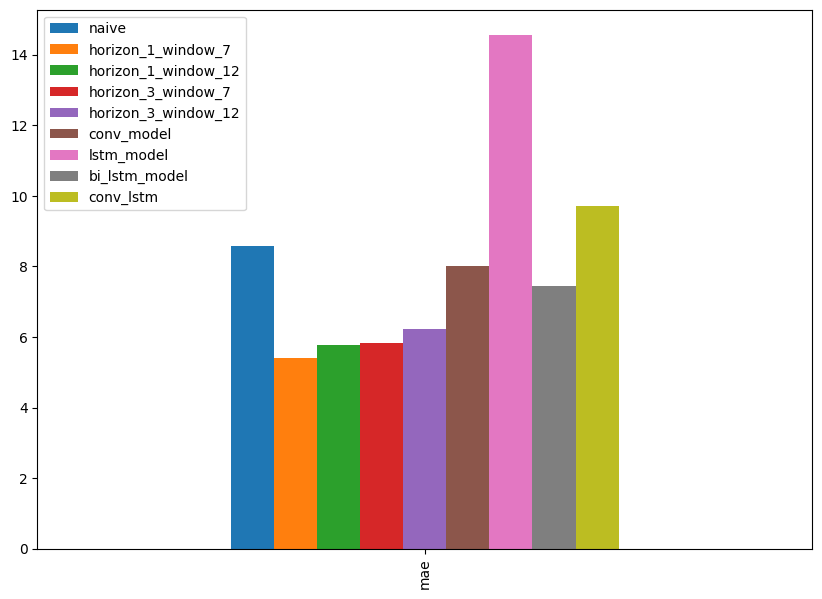

In [98]:
pd.DataFrame({"naive":naive_results['mae'],
              "horizon_1_window_7": model_2_results['mae'],
              "horizon_1_window_12": windows_12_results['mae'],
              "horizon_3_window_7": horizon_3_results['mae'],
              "horizon_3_window_12": h3w12_results['mae'],
              "conv_model": conv_model_results['mae'],
              "lstm_model": lstm_model_results['mae'],
              "bi_lstm_model": bi_lstm_model_results['mae'],
              "conv_lstm": conv_lstm_model_results['mae']},
             index=['mae']).plot(kind='bar', figsize=(10, 7));

### Making some predictions with our best model...

Our model 2 Dense architecture has performed the best. Since we already made and visualized some predictions using that model earlier in the notebook, the code has been replicated below:

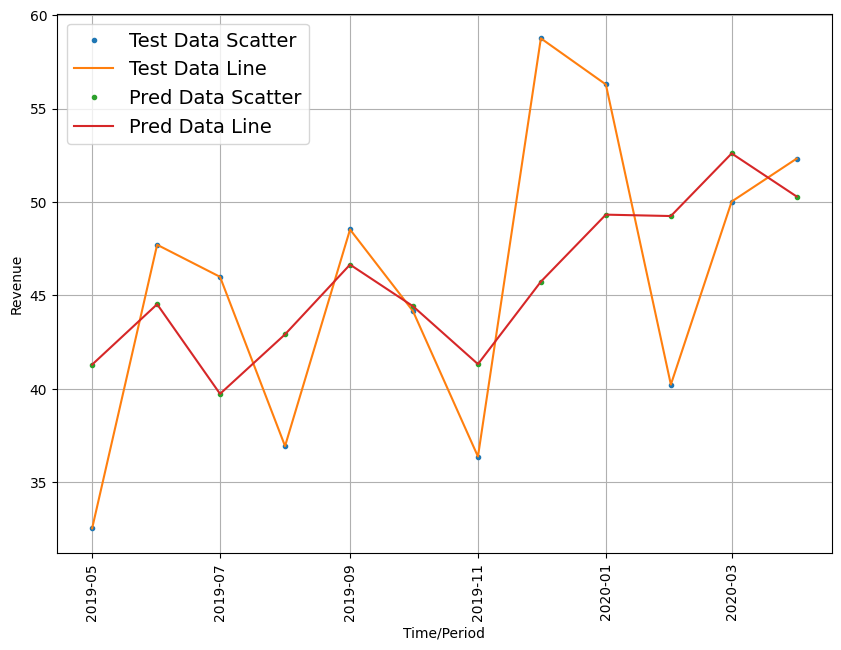

In [99]:
# Plot and visualize the results
offset = 0
plt.figure(figsize=(10, 7))

# Plot values in both formats so it's easier to see and understand
plot_ts(timesteps=X_test[-len(test_windows):],
        values=test_labels[:, 0],
        start=offset,
        format='.',
        label="Test Data Scatter")

plot_ts(timesteps=X_test[-len(test_windows):],
        values=test_labels[:, 0],
        start=offset,
        label="Test Data Line")

plot_ts(timesteps=X_test[-len(test_windows):],
        values=model_2_preds,
        start=offset,
        format='.',
        label="Pred Data Scatter")

plot_ts(timesteps=X_test[-len(test_windows):],
        values=model_2_preds,
        start=offset,
        label="Pred Data Line")

## [ **Thank you** ]